**Lead Scoring Logistic Regression Case Study** is divided into below sections:

* Import Python Packages
* Reading and Understanding the dataset
* Data Cleaning
* Exploratory Data Analysis
* Data Preparation
* Train-Test split
* Feature Scaling
* Model Building
* Model Evaluation
* Making Predictions on test dataset
* Model Parameters
* Conclusion
* Recommendations

## IMPORT PYTHON PACKAGES

In [3074]:
# Import the python packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix, precision_score, recall_score, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score

import warnings
warnings.filterwarnings('ignore')

## READING AND UNDERSTANDING THE DATASET

In [3075]:
# Read the dataset
lead_df = pd.read_csv('Leads.csv')

In [3076]:
# Get the dataset details using head()
lead_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [3077]:
# Get the shape of the dataset
lead_df.shape

(9240, 37)

In [3078]:
# Describe the dataset
lead_df.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.99])

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
90%    650506.100000     1.000000     7.000000                  1380.000000   
99%    659592.980000     1.000000    17.000000                  1840.610000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
90%                5.000000                    16.000000   
99%                9.000000                    17.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
90%                     19.000000  
99%                     20.000000  
max                     20.000000

**Insights:**
* After describing the dataset, it seems 'TotalVisits' and 'Page Views Per Visit' have some outliers.

In [3079]:
# Print the 'Not-Null Count' and 'Dtype' using info()
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

From the info data, we can see that the below columns have null values. We will validate this in the next section

* Page Views Per Visit
* Last Activity
* Country
* Specialization
* How did you hear about X Education
* What is your current occupation
* What matters most to you in choosing a course
* Tags
* Lead Quality
* Lead Profile
* City
* Asymmetrique Activity Index
* Asymmetrique Profile Index
* Asymmetrique Activity Score
* Asymmetrique Profile Score       

## DATA CLEANING

### Treatment for 'Select' values

As mentioned in the Problem Statement, many of the **categorical variables have a level called 'Select' which needs to be handled** because it is as good as a null value. One of the reason might be is that the customer did not select any option from the list and hence for such columns the data remained as default 'Select'.

In [3080]:
# Code block to get the list of columns having 'Select' values.

select_col = []
for col in lead_df.columns:
    if 'Select' in lead_df[col].values:
        select_col.append(col)

**Insights**:
The categorical columns having "Select" value are:
* Specialization
* How did you hear about X Education
* Lead Profile
* City

Let's **impute the 'Select' values** in these columns with null values

In [3081]:
# Impute above categorical columns having 'Select' with NaN
lead_df = lead_df.replace('Select', np.nan)

In [3082]:
# Let's validate if the 'Select' values are imputed
select_col = []
for col in lead_df.columns:
    if 'Select' in lead_df[col].values:
        select_col.append(col)
print(f'The categorical columns having "Select" value are: \n{select_col} \n')

The categorical columns having "Select" value are: 
[] 



**Insights:**
We can see that all columns having 'Select' values are imputed.

### Delete redundant columns i.e 'Prospect ID' and 'Lead Number'

In [3083]:
''' Columns 'Prospect ID' and 'Lead Number' are just ID's for the leads. 
They do not add any value to the analysis and hence can be dropped. '''

lead_df.drop(columns=['Prospect ID', 'Lead Number'], axis=1, inplace=True)

In [3084]:
# Let's check the dataset after dropping the columns
lead_df.head()

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      API      Olark Chat           No          No   
1                      API  Organic Search           No          No   
2  Landing Page Submission  Direct Traffic           No          No   
3  Landing Page Submission  Direct Traffic           No          No   
4  Landing Page Submission          Google           No          No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity Country  ... Get updates on DM Content  \
0  Page Visited on Website     NaN  ...                        No   
1             Email Opened   India  ...                        No   
2             Email Opened   India  ...                        No   
3              Unreachable   India  ...                        No   
4        Converted to Lead   India  ...                        No   

     Lead Profile    City Asymmetrique Activity Index  \
0             NaN     NaN                   02.Medium   
1             NaN     NaN                   02.Medium   
2  Potential Lead  Mumbai                   02.Medium   
3             NaN  Mumbai                   02.Medium   
4             NaN  Mumbai                   02.Medium   

  Asymmetrique Profile Index Asymmetrique Activity Score  \
0                  02.Medium                        15.0   
1                  02.Medium                        15.0   
2                    01.High                        14.0   
3                    01.High                        13.0   
4                    01.High                        15.0   

  Asymmetrique Profile Score I agree to pay the amount through cheque  \
0                       15.0                                       No   
1                       15.0                                       No   
2                       20.0                                       No   
3                       17.0                                       No   
4                       18.0                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 35 columns]

### Treatment for columns with unique values

In [3085]:
# Checking columns which have one unique value and dropping them as they will not affect our analysis
lead_df.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [3086]:
# Drop the columns with unique values

# Code block to get the columns with unique values and drop them
lead_columns = lead_df.columns

for col in lead_columns:
    if lead_df[col].nunique() == 1:
        lead_df.drop(col, axis=1, inplace=True)

### Treatment for null values

In [3087]:
# Let's check the percentage of null values

round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

#### Delete the columns where null value percentage is > 40%

**Delete the below columns as the null value percentage is above 40%:**

* How did you hear about X Education
* Lead Quality
* Lead Profile
* Asymmetrique Activity Index
* Asymmetrique Profile Index
* Asymmetrique Activity Score 
* Asymmetrique Profile Score  

In [3088]:
# Code block to delete the columns having more than 40% of null values
lead_columns = lead_df.columns

for col in lead_columns:
    if lead_df[col].isnull().sum()/len(lead_df)*100 > 40:
        lead_df.drop(col, axis=1, inplace=True)

#### Impute the null values for the columns where null value percentage > 15%

In [3089]:
# Check the null value percentage
round((lead_df.isnull().sum()/len(lead_df.index))*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

**We'll have to impute the null values for the below columns:**

* Country
* Specialization
* What is your current occupation
* What matters most to you in choosing a course
* Tags
* City

In [3090]:
# Code block to get the list of columns where the null value percentage is greater than 15%
lead_columns = lead_df.columns

null_value_15 = []
for col in lead_columns:
    if lead_df[col].isnull().sum()/len(lead_df)*100 > 15:
        null_value_15.append(col)
        
print(f"Columns with null value percentage > 15% are: {null_value_15} \n")

Columns with null value percentage > 15% are: ['Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'City'] 



In [3091]:
# Utility function to get the value count and plot the graph for the columns

def value_count_and_plot_graph(col):
    print(f'******************************************************************************************** \n')
    print(f'{lead_df[col].value_counts(normalize=True, dropna=False)*100} \n')
    plt.figure(figsize=(15,5))
    sns.countplot(x=lead_df[col], hue=lead_df.Converted)
    plt.xticks(rotation=90)
    plt.show()

##### Country

******************************************************************************************** 

Country
India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Philippines              0.021645
Uganda                   0.021645
Italy                    0.021645
Bangladesh               0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
China        

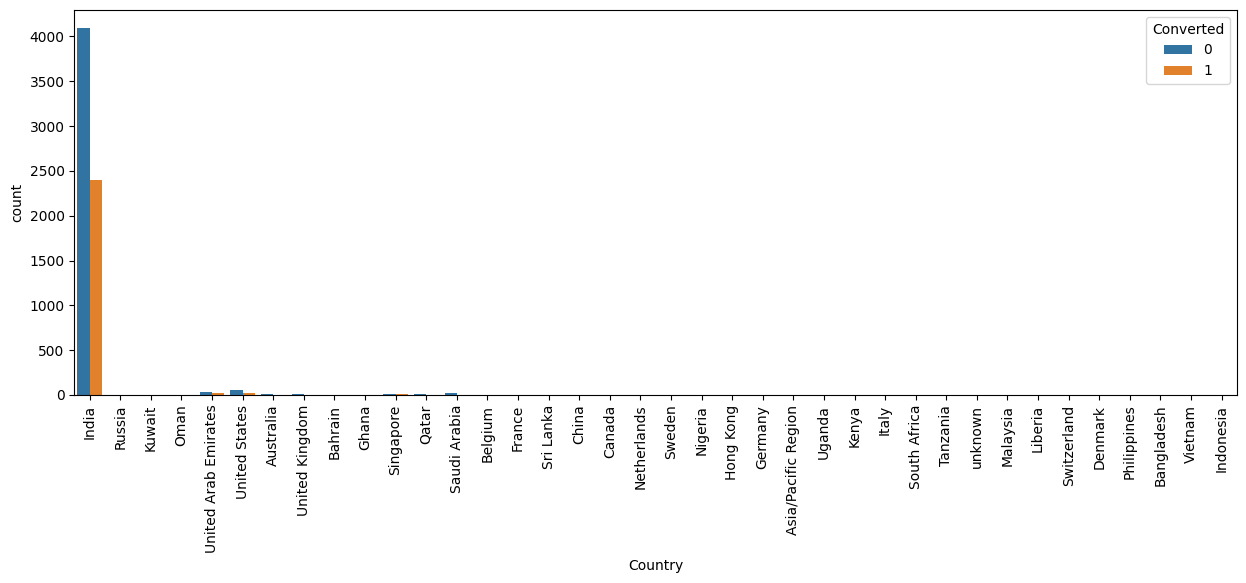

In [3092]:
# Let's start analysing the column 'country'
value_count_and_plot_graph('Country')

**Insights:**

As we can see that both India and NaN together make up ~96% of the data. This is a highly skewed data and hence this column will not contribute much to the analysis, this column can be dropped.

In [3093]:
# Create a list to drop the columns
col_to_drop = ['Country']

##### Specialization

******************************************************************************************** 

Specialization
NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.4329

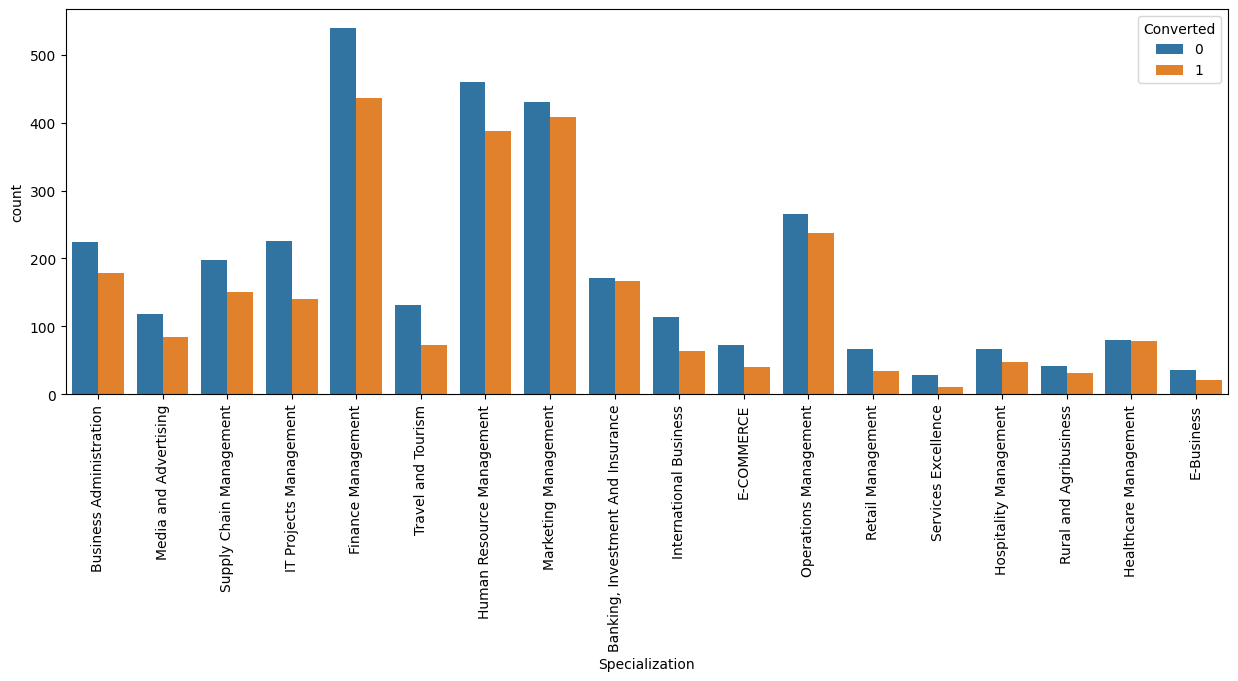

In [3094]:
# Let's check the column 'Specialization'
value_count_and_plot_graph('Specialization')

**Insights**:
* We can see that management leads are higher in number. They also have highest number of converted leads.

In [3095]:
# Get the mode for 'Specialization' column
mode = lead_df['Specialization'].mode()
mode

0    Finance Management
Name: Specialization, dtype: object

In [3096]:
# Let's replace the NaN with the mode i,e Marketing Specialization
lead_df['Specialization'] = lead_df['Specialization'].replace(np.nan, 'Marketing Specialization')

In [3097]:
# Let's categorize the 'Specilization' column into three broad categories

# Combining  Management Speciliazations:
lead_df['Specialization'] = lead_df['Specialization'].replace(
    ['Finance Management', 'Human Resource Management', 'Marketing Management', 
     'Operations Management', 'IT Projects Management', 'Supply Chain Management', 
     'Healthcare Management', 'Hospitality Management', 'Retail Management'], 
    'Marketing Specialization')

# Combining Administration Specializations
lead_df['Specialization'] = lead_df['Specialization'].replace(
    ['Business Administration', 'International Business', 'Rural and Agribusiness', 
     'E-Business'], 'Administration Specialization')

# Combining Industry Specializations
lead_df['Specialization'] = lead_df['Specialization'].replace(
    ['Banking, Investment And Insurance', 'Travel and Tourism', 
     'Media and Advertising', 'E-COMMERCE', 'Services Excellence'], 'Industry Specialization')

******************************************************************************************** 

Specialization
Marketing Specialization         82.608225
Industry Specialization           9.696970
Administration Specialization     7.694805
Name: proportion, dtype: float64 



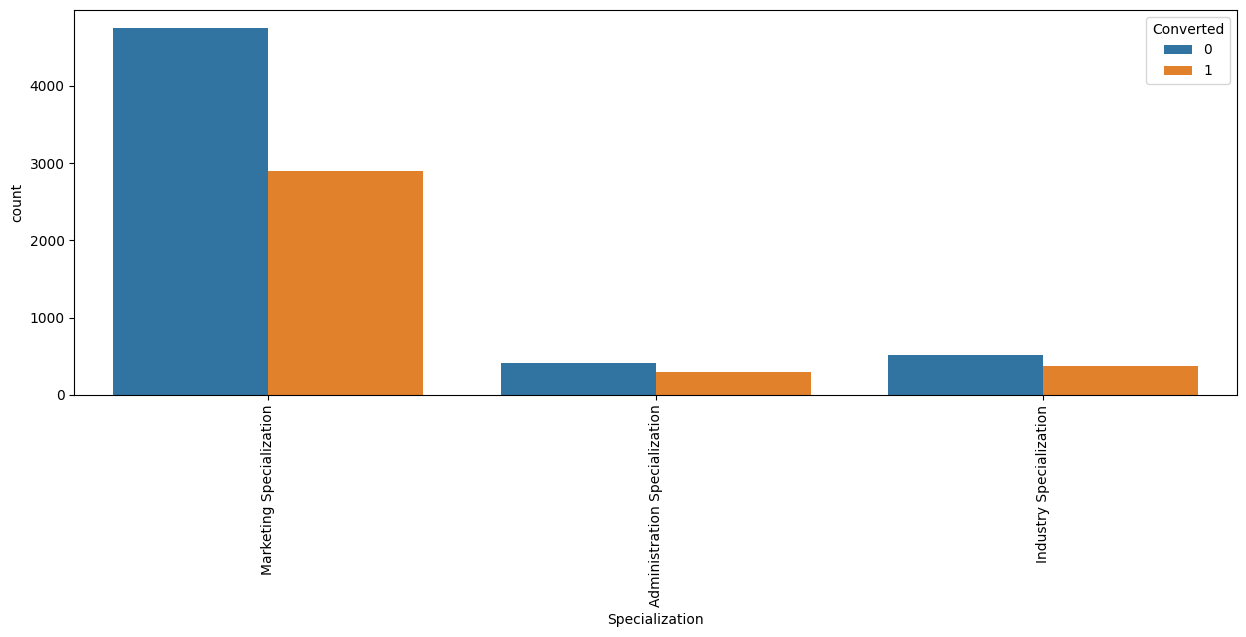

In [3098]:
# Let's check the column 'Specialization' after combining the specializations
value_count_and_plot_graph('Specialization')

##### What is your current occupation

******************************************************************************************** 

What is your current occupation
Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: proportion, dtype: float64 



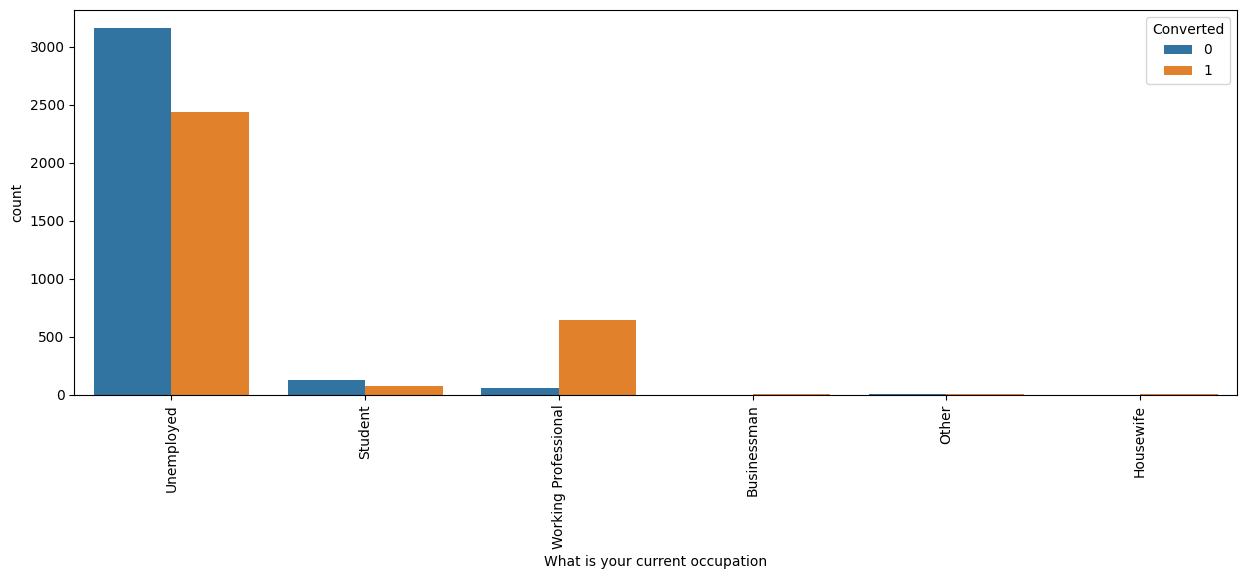

In [3099]:
# Let's check the column 'What is your current occupation'
value_count_and_plot_graph('What is your current occupation')

In [3100]:
# Get the mode for 'What is your current occupation' column
mode = lead_df['What is your current occupation'].mode()
mode

0    Unemployed
Name: What is your current occupation, dtype: object

In [3101]:
# Let's impute the NaN values with the mode i.e 'Unemployed'
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace(np.nan, 'Unemployed')

******************************************************************************************** 

What is your current occupation
Unemployed              89.718615
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: proportion, dtype: float64 



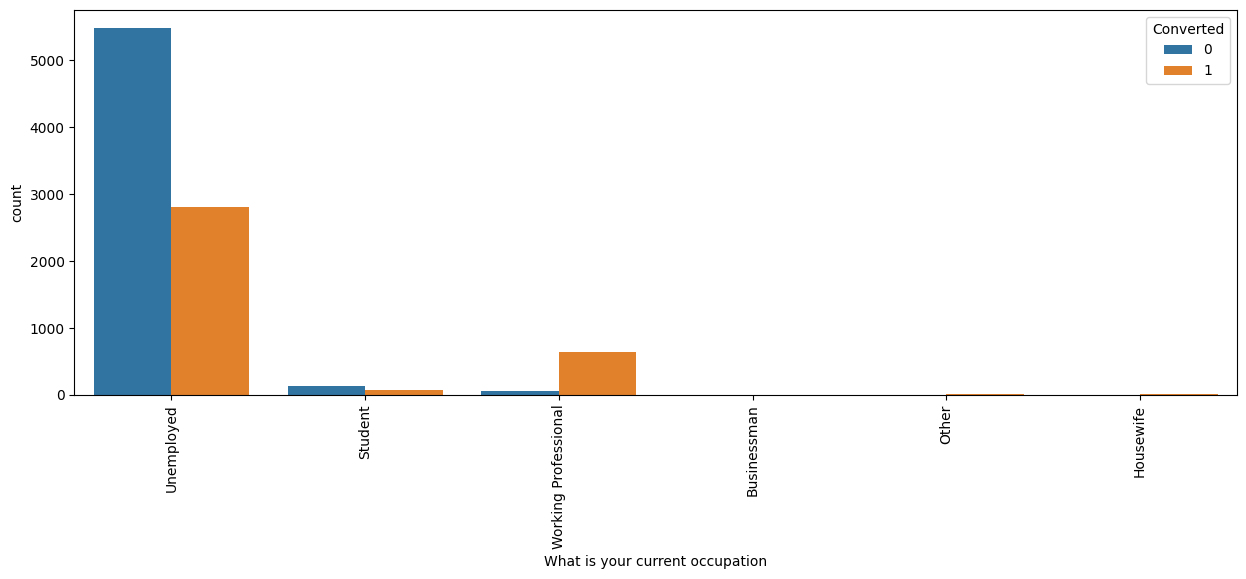

In [3102]:
# Let's check the value count and countplot after imputation
value_count_and_plot_graph('What is your current occupation')

**Insights**:
* 'Unemployed' leads has the highest count
* 'Working Professional' leads have the highest chance of joining the course

##### What matters most to you in choosing a course

******************************************************************************************** 

What matters most to you in choosing a course
Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: proportion, dtype: float64 



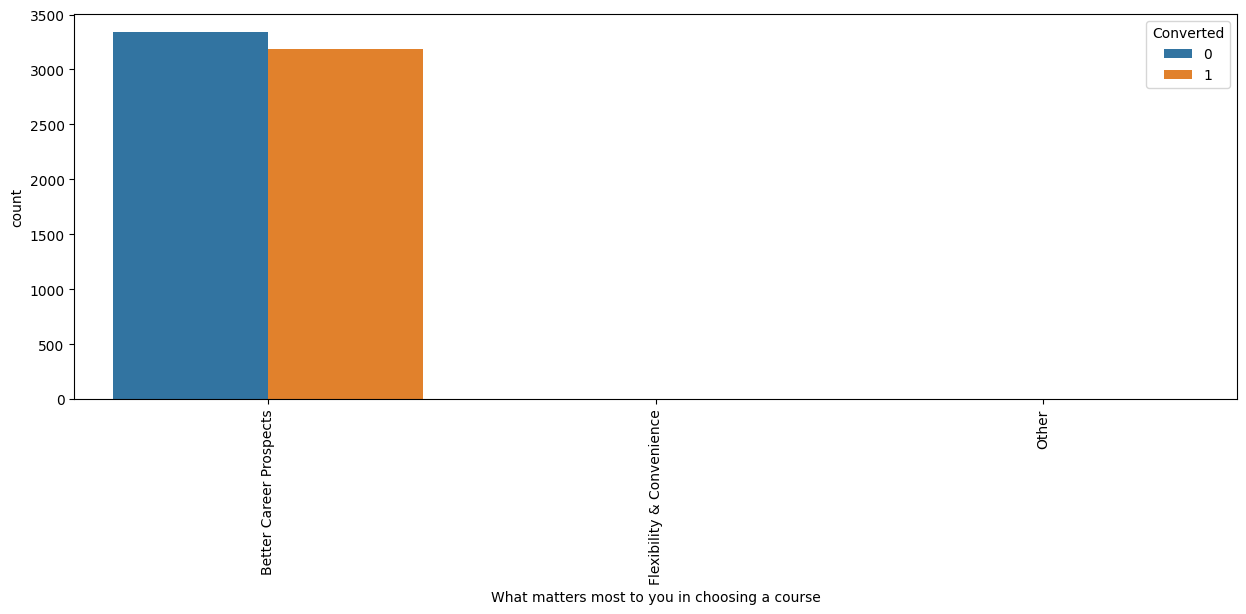

In [3103]:
# Let's check the column 'What matters most to you in choosing a course'
value_count_and_plot_graph('What matters most to you in choosing a course')

In [3104]:
# Let's check the mode for column 'What matters most to you in choosing a course'
mode = lead_df['What matters most to you in choosing a course'].mode()
print(mode)

0    Better Career Prospects
Name: What matters most to you in choosing a course, dtype: object


In [3105]:
# Let's impute NaN with the mode of the column
lead_df['What matters most to you in choosing a course'] = lead_df['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

******************************************************************************************** 

What matters most to you in choosing a course
Better Career Prospects      99.967532
Flexibility & Convenience     0.021645
Other                         0.010823
Name: proportion, dtype: float64 



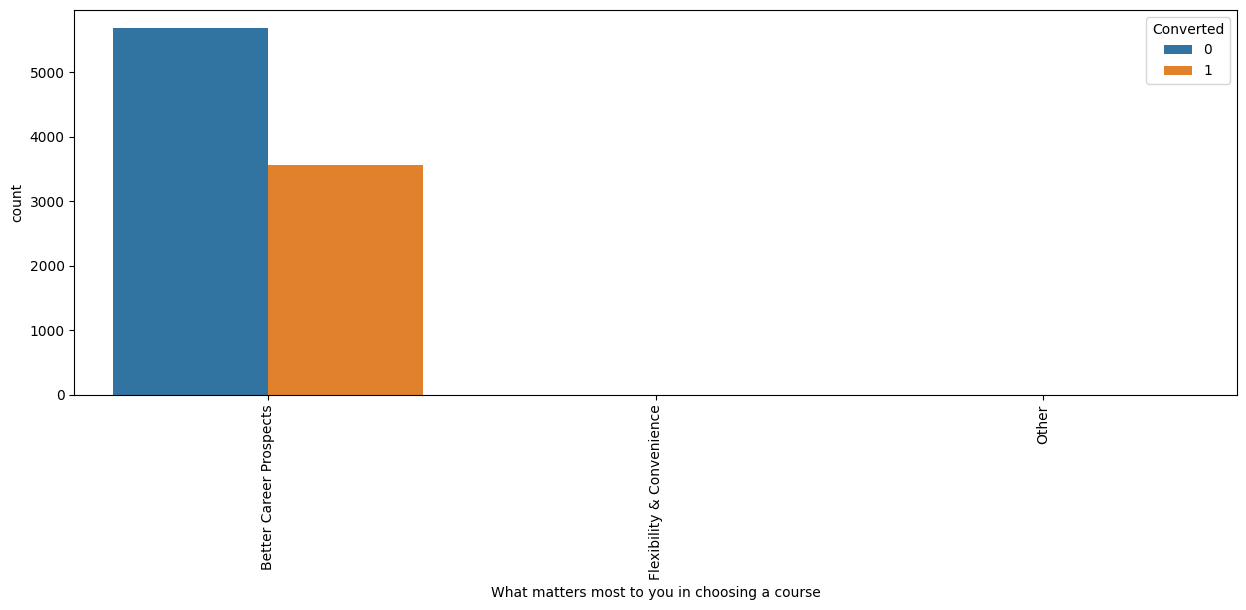

In [3106]:
# Let's check the value count and countplot after imputation
value_count_and_plot_graph('What matters most to you in choosing a course')

**Insights:**

As we can see that 'Better Career Prospects' make up ~99.9% of the data. This is a highly skewed data and hence this column will not contribute much to the analysis, this column can be dropped. Will add this column to the dropped list.

In [3107]:
# Appending 'What matters most to you in choosing a course' column to columns to be dropped list
col_to_drop.append('What matters most to you in choosing a course')

##### Tags

******************************************************************************************** 

Tags
NaN                                                  36.287879
Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given

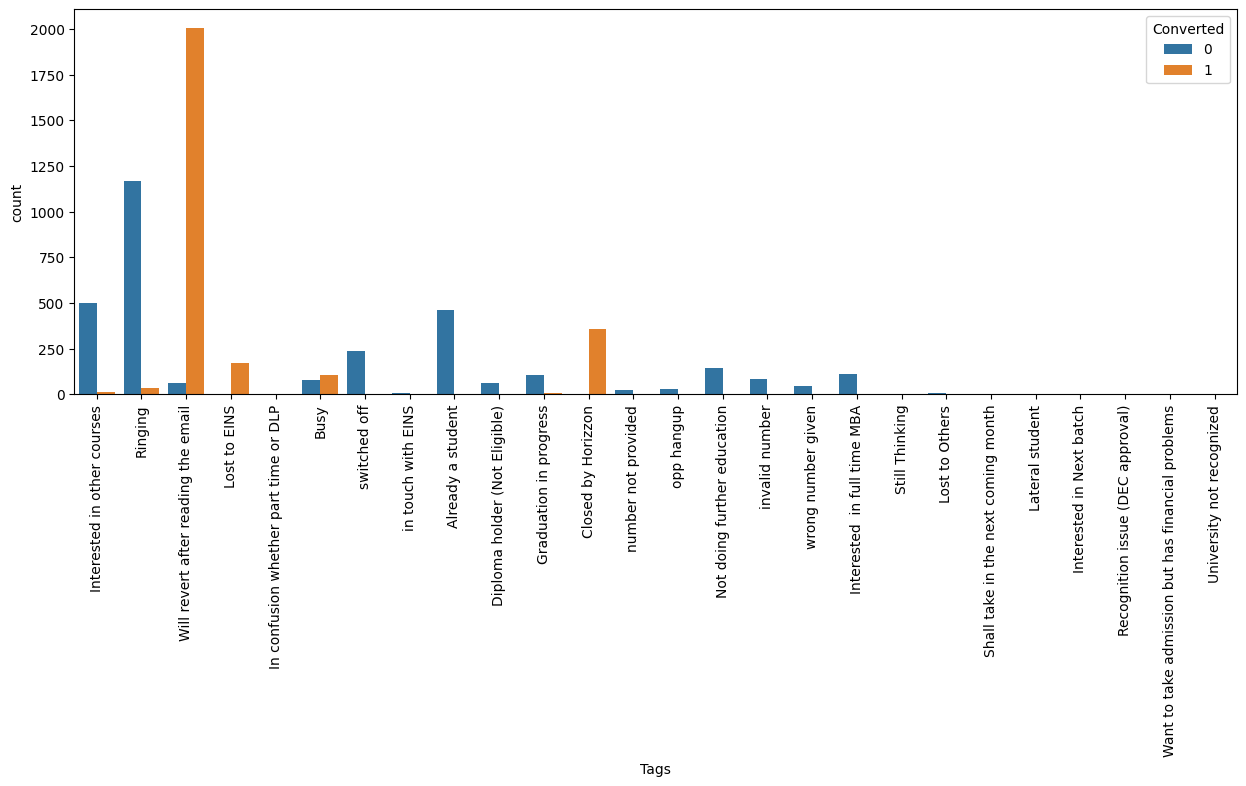

In [3108]:
# Let's check the column 'Tags'
value_count_and_plot_graph('Tags')

In [3109]:
# Let's impute the NaN with 'Not Specified'
lead_df['Tags'] = lead_df['Tags'].replace(np.nan, 'Not Specified')

******************************************************************************************** 

Tags
Not Specified                                        36.287879
Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given

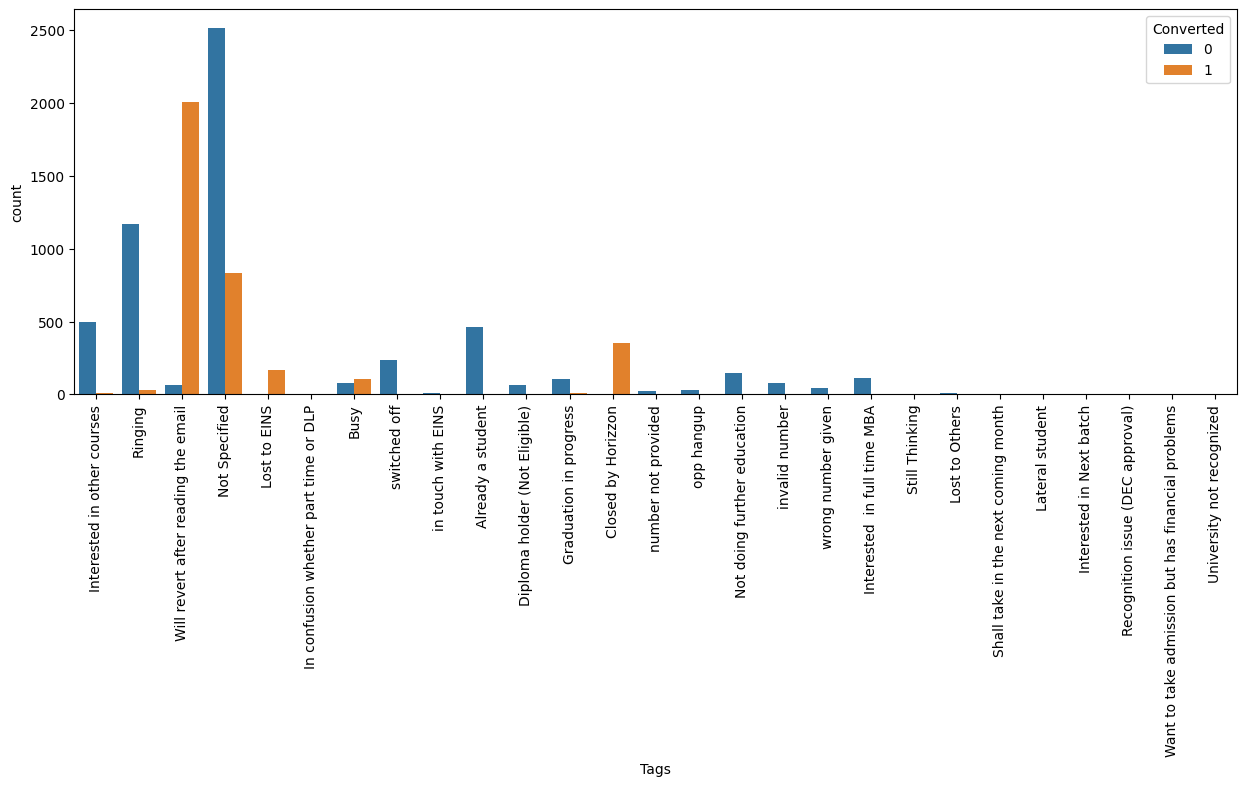

In [3110]:
# Let's check the value count and plot after imputation
value_count_and_plot_graph('Tags')

In [3111]:
# Let's add all low value count tags to a single tag 'Others'
lead_df['Tags'] = lead_df['Tags'].replace(
    ['Interested in other courses', 'In confusion whether part time or DLP', 
     'invalid number', 'Diploma holder (Not Eligible)', 'wrong number given', 'opp hangup', 
     'number not provided', 'in touch with EINS', 'Lost to Others', 'Still Thinking', 
     'Want to take admission but has financial problems', 'Interested in Next batch', 
     'Lateral student', 'Shall take in the next coming month', 'University not recognized', 
     'Recognition issue (DEC approval)', 'Already a student', 'switched off', 
     'Not doing further education', 'Interested  in full time MBA', 
     'Graduation in progress'], 'Others')

******************************************************************************************** 

Tags
Not Specified                          36.287879
Will revert after reading the email    22.424242
Others                                 20.487013
Ringing                                13.019481
Closed by Horizzon                      3.874459
Busy                                    2.012987
Lost to EINS                            1.893939
Name: proportion, dtype: float64 



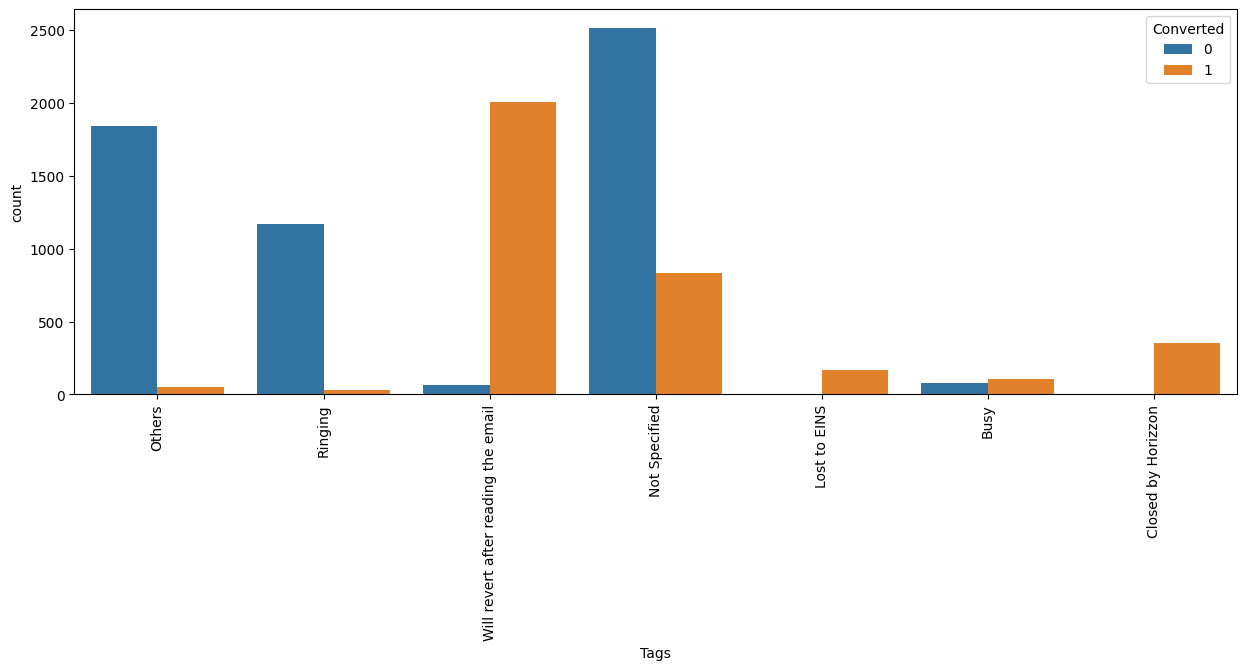

In [3112]:
# Let's check the value counts and countplot after categorizing the values
value_count_and_plot_graph('Tags')

##### City

******************************************************************************************** 

City
NaN                            39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: proportion, dtype: float64 



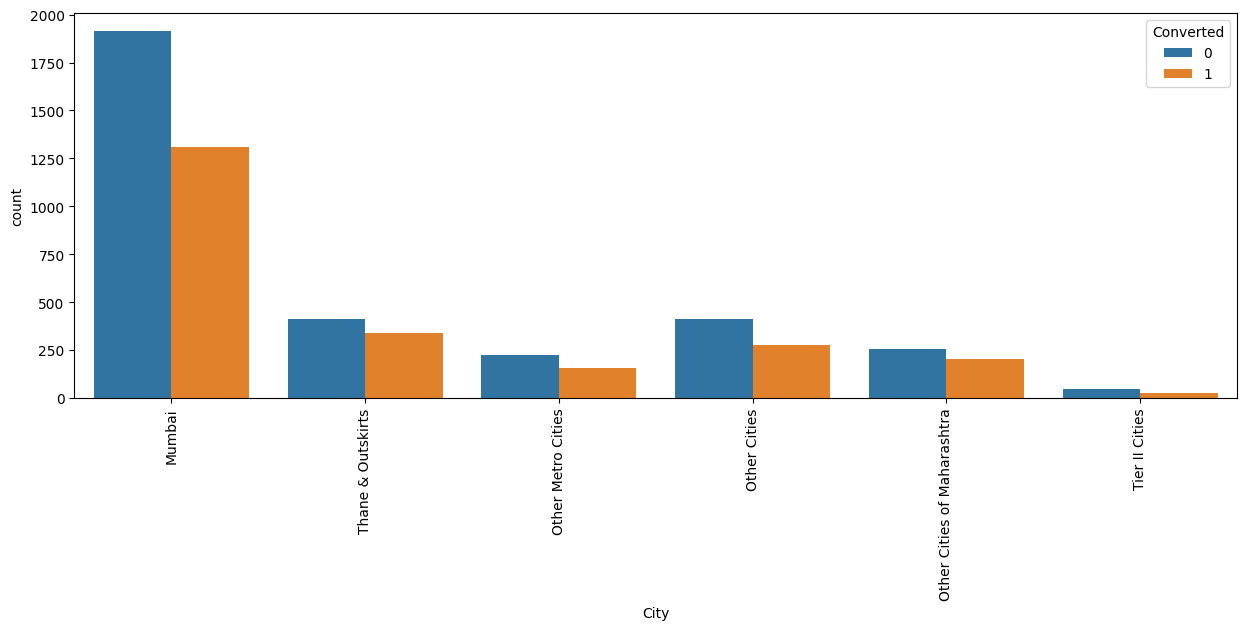

In [3113]:
# Let's check the column 'City'
value_count_and_plot_graph('City')

In [3114]:
# Check mode for 'City' column
mode = lead_df['City'].mode()
mode

0    Mumbai
Name: City, dtype: object

In [3115]:
# Let's replace NaN values in City column with the mode i.e Mumbai
lead_df['City'] = lead_df['City'].replace(np.nan, 'Mumbai')

******************************************************************************************** 

City
Mumbai                         74.577922
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: proportion, dtype: float64 



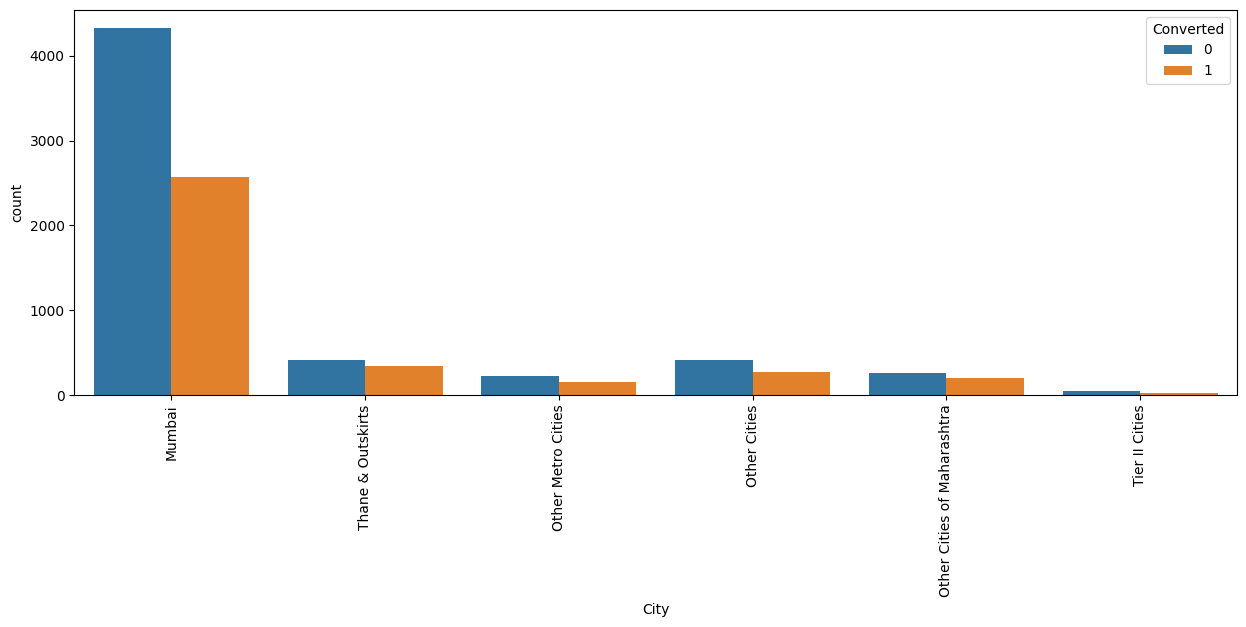

In [3116]:
# Let's check the value count and countplot after imputing the NaN values
value_count_and_plot_graph('City')

**Insights:**
* Highest converted leads is from Mumbai

In [3117]:
# Let's check the null values at this stage
round((lead_df.isnull().sum()/len(lead_df.index))*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

##### Lead Source

******************************************************************************************** 

Lead Source
Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
NaN                   0.389610
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: proportion, dtype: float64 



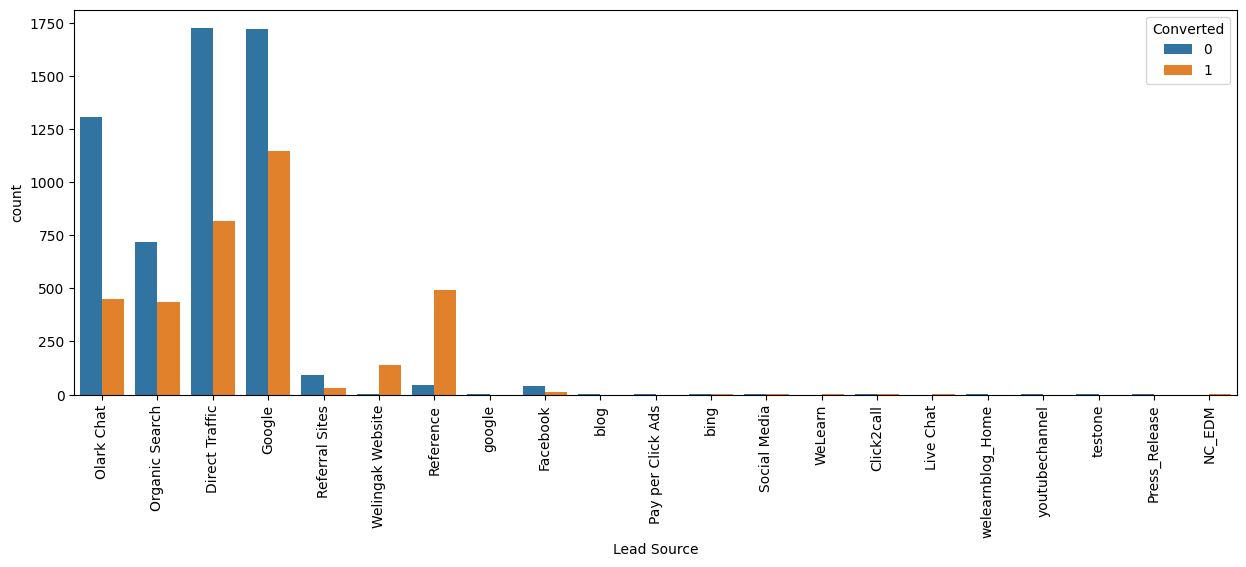

In [3118]:
# Let's check the column 'Lead Source'
value_count_and_plot_graph('Lead Source')

**Insights:**
From the above data we can see that that there are two variations of Google and google. Let's replace google with Google.

In [3119]:
# Code to replace 'google' with 'Google'
lead_df['Lead Source'] = lead_df['Lead Source'].replace('google', 'Google')

******************************************************************************************** 

Lead Source
Google               31.093074
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
NaN                   0.389610
bing                  0.064935
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: proportion, dtype: float64 



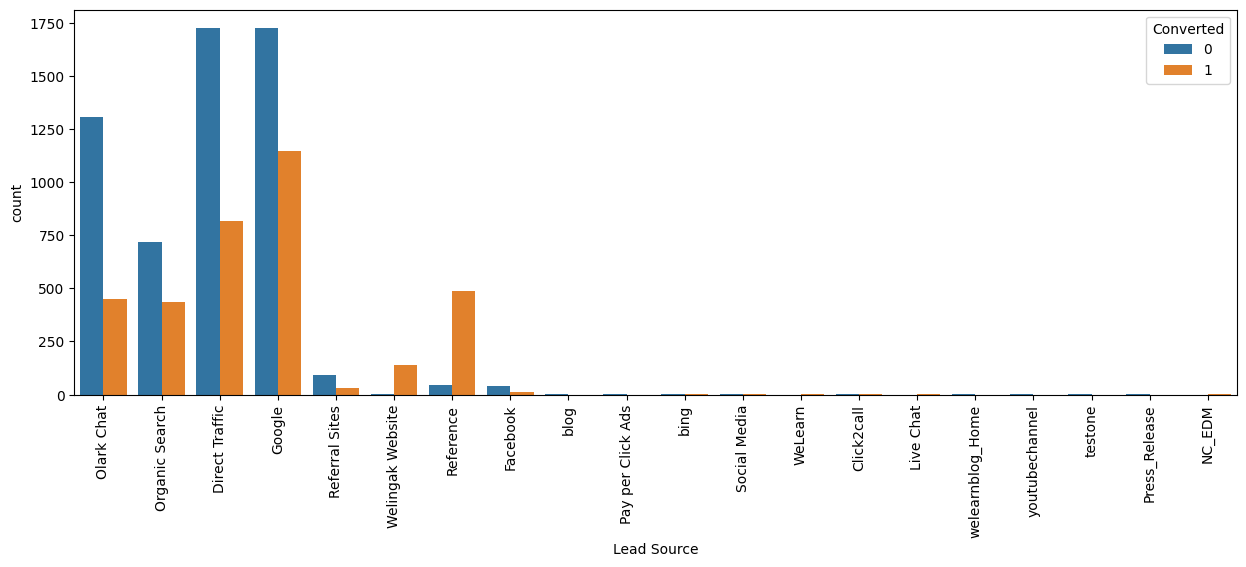

In [3120]:
# Let's check the value count and countplot after manipulating the values
value_count_and_plot_graph('Lead Source')

In [3121]:
# Get the mode for 'Lead Source' column
mode = lead_df['Lead Source'].mode()
mode

0    Google
Name: Lead Source, dtype: object

In [3122]:
# Let's impute the missing values with the mode of the column i.e Google
lead_df['Lead Source'] = lead_df['Lead Source'].replace(np.nan, 'Google')

******************************************************************************************** 

Lead Source
Google               31.482684
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
Click2call            0.043290
Social Media          0.021645
Live Chat             0.021645
Press_Release         0.021645
Pay per Click Ads     0.010823
blog                  0.010823
WeLearn               0.010823
welearnblog_Home      0.010823
youtubechannel        0.010823
testone               0.010823
NC_EDM                0.010823
Name: proportion, dtype: float64 



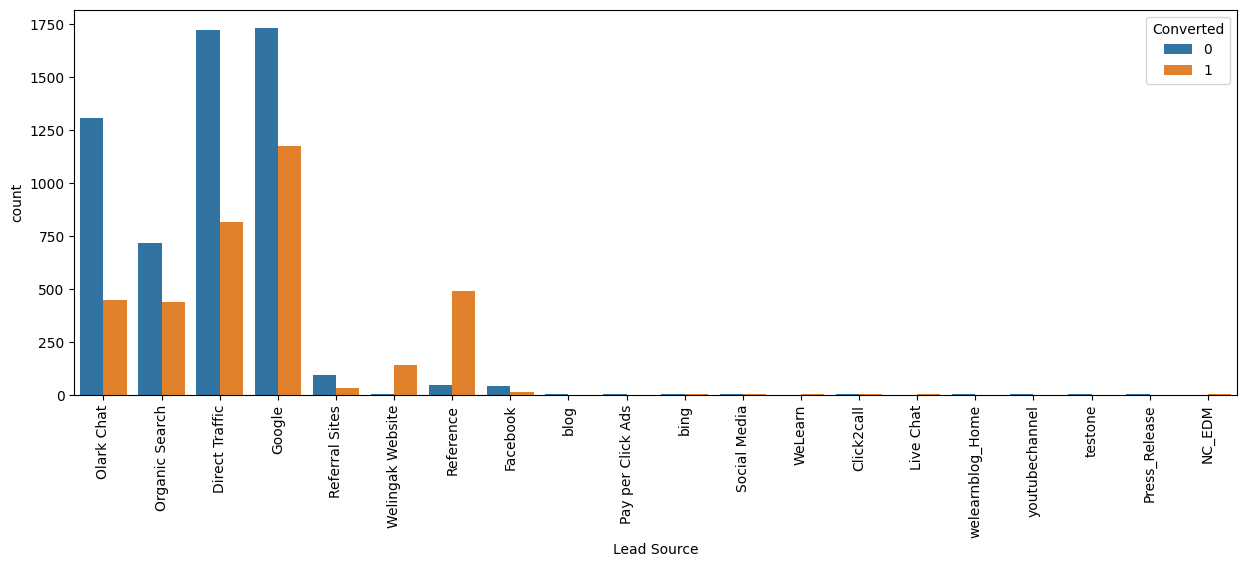

In [3123]:
# Let's check the value count and plot after imputing the values
value_count_and_plot_graph('Lead Source')

In [3124]:
# Let's combine all low frequency value into one single category 'Others'
lead_df['Lead Source'] = lead_df['Lead Source'].replace(
    ['bing', 'Click2call', 'Social Media', 'Live Chat', 'Press_Release', 
     'Pay per Click Ads', 'blog', 'WeLearn', 'welearnblog_Home', 'youtubechannel', 
     'testone', 'NC_EDM'], 'Others')

******************************************************************************************** 

Lead Source
Google              31.482684
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Facebook             0.595238
Others               0.248918
Name: proportion, dtype: float64 



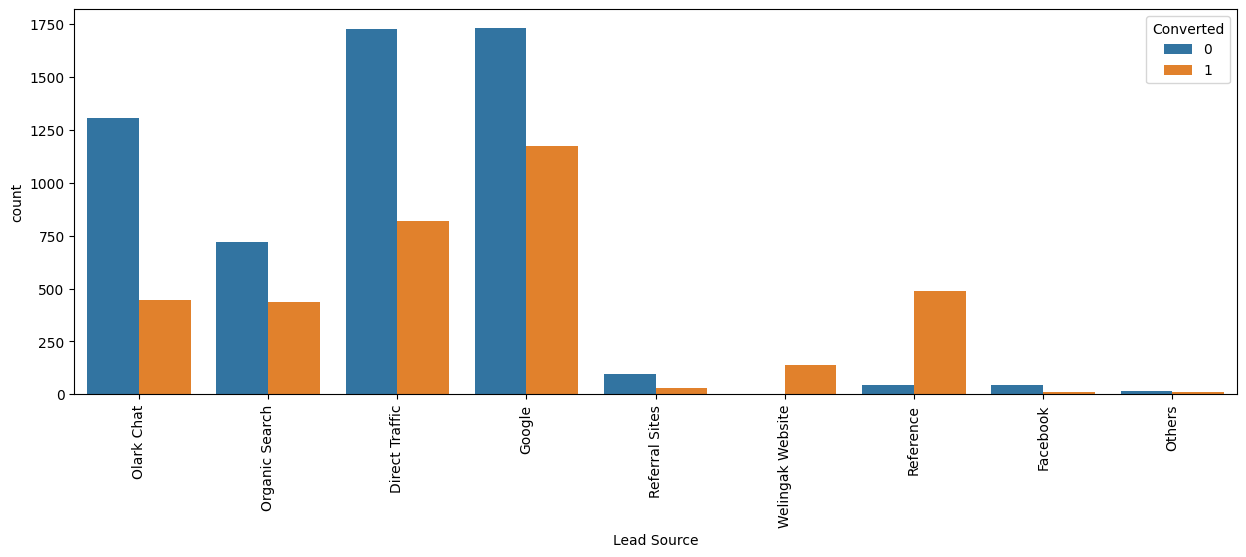

In [3125]:
# Let's check the value count and count plot after imputing and creating new category for 'Lead Source'
value_count_and_plot_graph('Lead Source')

**Insights:**

* Conversion Rate of 'Reference' leads and 'Welingak Website' leads is high.
* 'Google' and 'Direct traffic' leads are the one with highest number of leads.
* Lead converion of 'Olark Chat', 'Organic Search', 'Direct traffic' should be improved.

#### Treat columns where null value percentage ~1%

In [3126]:
# Let's check the missing values for the remaining columns
round((lead_df.isnull().sum()/len(lead_df.index))*100,2)

Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

**The below three columns have ~1% of missing values, let's target then now.**
* TotalVisits - This column will be targeted under outlier treatment
* Page Views Per Visit - This column will be targeted under outlier treatment
* Last Activity

##### Last Activity

******************************************************************************************** 

Last Activity
Email Opened                    37.196970
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
NaN                              1.114719
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: proportion, dtype: float64 



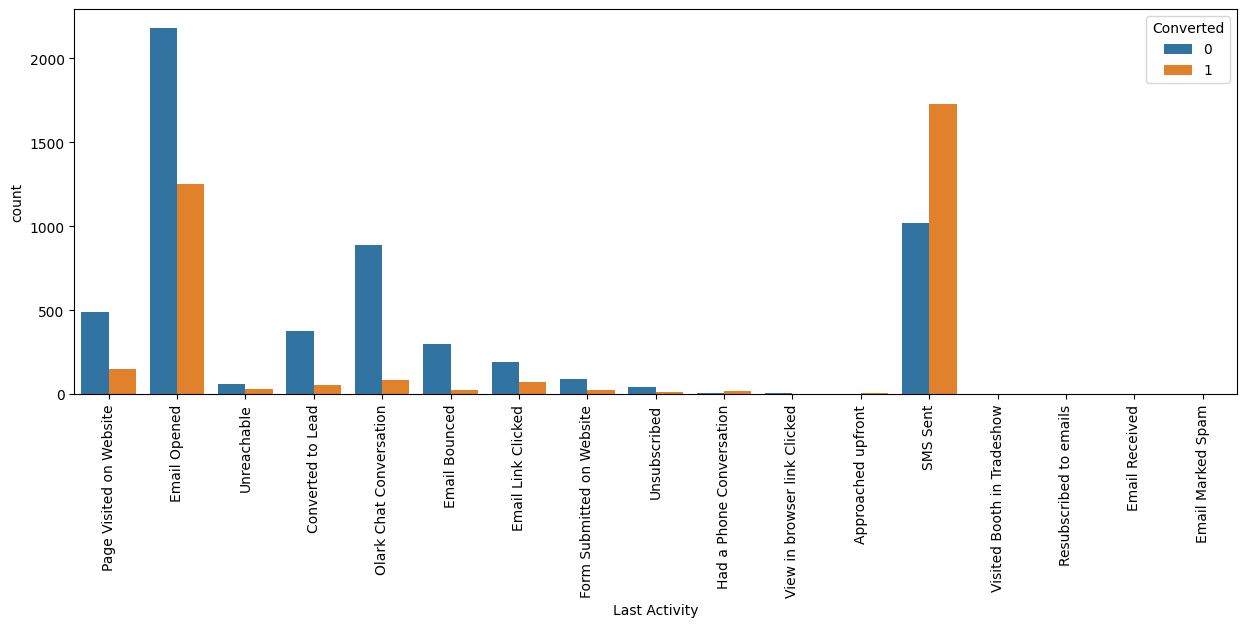

In [3127]:
# Let's check the column 'Last Activity'
value_count_and_plot_graph('Last Activity')

In [3128]:
# Get the mode for the column 'Last Activity'
mode = lead_df['Last Activity'].mode()
mode

0    Email Opened
Name: Last Activity, dtype: object

In [3129]:
''' Let's impute missing values with the mode i.e 'Email Opened' and 
categorize all low frequency values to one single category 'Others'.'''

# Replace NaN with mode
lead_df['Last Activity'] = lead_df['Last Activity'].replace(np.nan, 'Email Opened')

# Categorize all low frequency values into one single category 'Others'
lead_df['Last Activity'] = lead_df['Last Activity'].replace(
    ['Unsubscribed', 'Had a Phone Conversation', 'Approached upfront', 
     'View in browser link Clicked', 'Email Received', 'Email Marked Spam', 
     'Visited Booth in Tradeshow', 'Resubscribed to emails'], 'Others')

******************************************************************************************** 

Last Activity
Email Opened                 38.311688
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Email Link Clicked            2.889610
Form Submitted on Website     1.255411
Others                        1.212121
Unreachable                   1.006494
Name: proportion, dtype: float64 



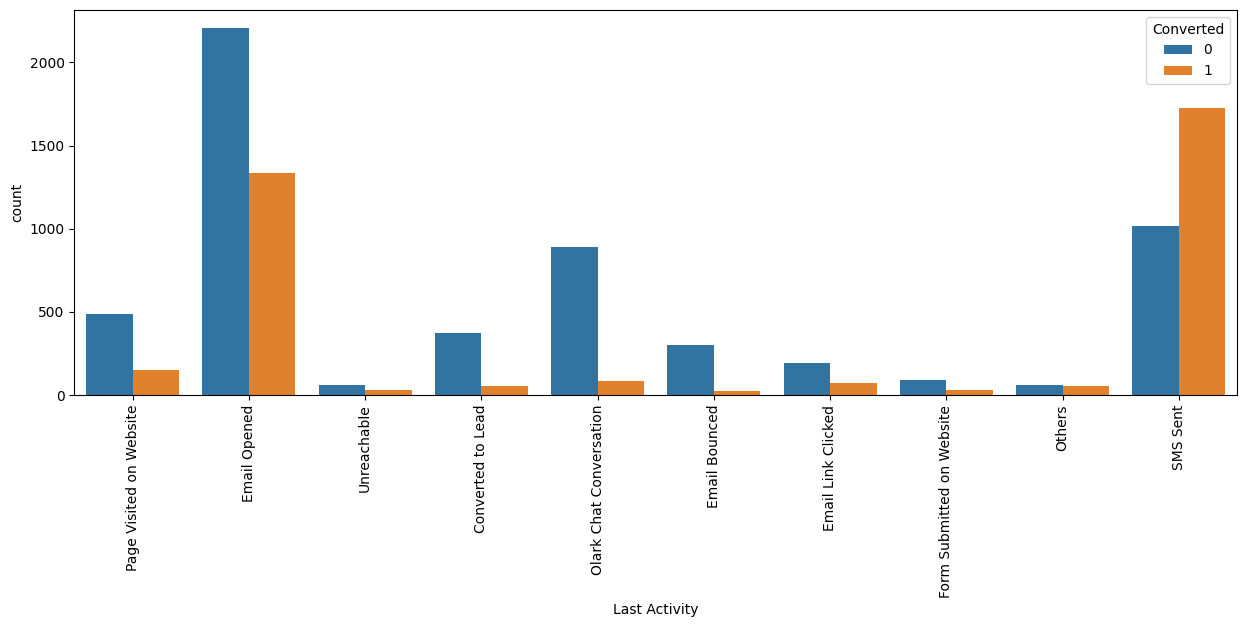

In [3130]:
# Let's check the value count and plot after imputation
value_count_and_plot_graph('Last Activity')

**Insights:**

* 'Email Opened' has a highest number of leads. The conversion rate is also good.
* Conversion rate 'SMS Sent' is very high.

### Outlier Treatment

From the above intial Analysis(under the READING AND UNDERSTANDING THE DATASET section) we saw that there were outliers for column **'TotalVisits'** and **'Page Views Per Visit'**.
Let's start outlier analysis and treatment on these two columns.

##### TotalVisits

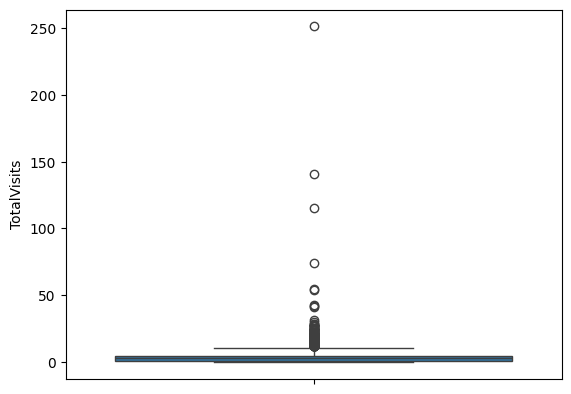

In [3131]:
# Let's check column 'TotalVisits'
sns.boxplot(y=lead_df['TotalVisits'], data=lead_df)
plt.show()

In [3132]:
# Describe the column 'TotalVisits'
lead_df['TotalVisits'].describe(percentiles=[0.25, 0.5, 0.75, 0.90, 0.99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

**Insights:**<br>
We can see that outliers are present only in the upper range. So we'll treat the outliers.

In [3133]:
# Treating outliers by capping the upper range to 99%
Q3 = lead_df['TotalVisits'].quantile(0.99)
lead_df = lead_df[(lead_df['TotalVisits'] <= Q3)]

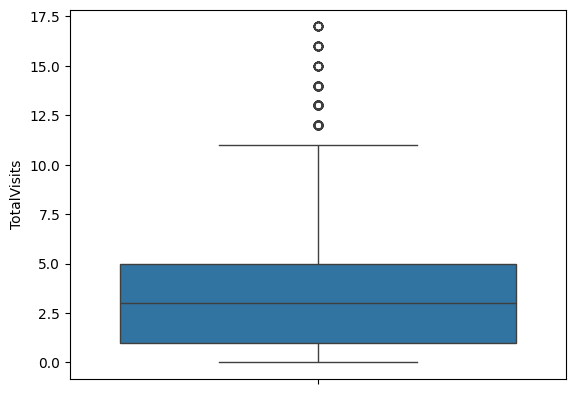

In [3134]:
# Let's check column 'TotalVisits' after removing the outliers
sns.boxplot(y=lead_df['TotalVisits'], data=lead_df)
plt.show()

##### Page Views Per Visit

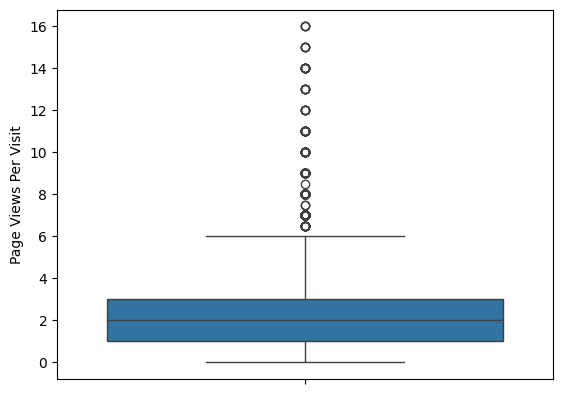

In [3135]:
# Let's check column 'Page Views Per Visit'
sns.boxplot(y=lead_df['Page Views Per Visit'], data=lead_df)
plt.show()

In [3136]:
# Describe the column 'Page Views Per Visit'
lead_df['Page Views Per Visit'].describe(percentiles=[0.25, 0.5, 0.75, 0.90, 0.99])

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

**Insights:**<br>
We can see that outliers are present only in the upper range. So we'll treat the outliers.

In [3137]:
# Treating outliers by capping the upper range to 99%
Q3 = lead_df['Page Views Per Visit'].quantile(0.99)
lead_df = lead_df[(lead_df['Page Views Per Visit'] <= Q3)]

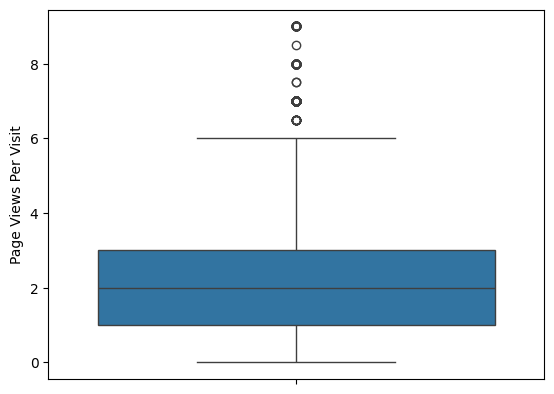

In [3138]:
# Let's check column 'Page Views Per Visit' after removing the outliers
sns.boxplot(y=lead_df['Page Views Per Visit'], data=lead_df)
plt.show()

In [3139]:
# Let's check the null values at this stage
round((lead_df.isnull().sum()/len(lead_df.index))*100, 2) 

Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
Country                                          25.95
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

**Insights:**
At this stage we can see that all null values are handled.
We'll delete the columns Country and Specialization (already added to col_to_drop) later after the complete analysis and cleaning is done.

### General Analysis for remaining columns

##### Total Time Spent on Website

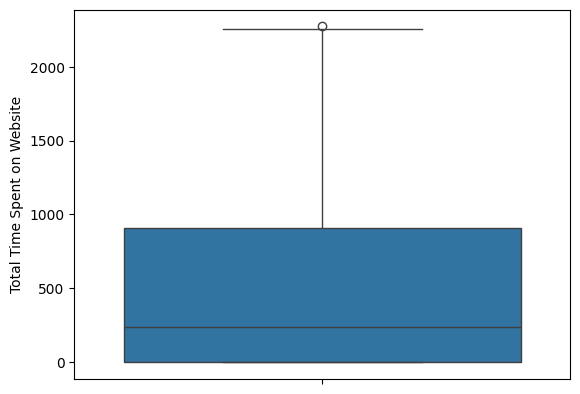

In [3140]:
# Let's check the column 'Total Time Spent on Website'
sns.boxplot(y=lead_df['Total Time Spent on Website'], data=lead_df)
plt.show()

**Insights:**<br>
From the boxplot we can see that no outliers are present, so no treatment is required.

In [3141]:
# Let's check the head and see which column to verify next
lead_df.head()

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      API      Olark Chat           No          No   
1                      API  Organic Search           No          No   
2  Landing Page Submission  Direct Traffic           No          No   
3  Landing Page Submission  Direct Traffic           No          No   
4  Landing Page Submission          Google           No          No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity Country  ... Search Newspaper Article  \
0  Page Visited on Website     NaN  ...     No                No   
1             Email Opened   India  ...     No                No   
2             Email Opened   India  ...     No                No   
3              Unreachable   India  ...     No                No   
4        Converted to Lead   India  ...     No                No   

  X Education Forums Newspaper Digital Advertisement Through Recommendations  \
0                 No        No                    No                      No   
1                 No        No                    No                      No   
2                 No        No                    No                      No   
3                 No        No                    No                      No   
4                 No        No                    No                      No   

                                  Tags    City  \
0                               Others  Mumbai   
1                              Ringing  Mumbai   
2  Will revert after reading the email  Mumbai   
3                              Ringing  Mumbai   
4  Will revert after reading the email  Mumbai   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 23 columns]

##### Lead Origin

******************************************************************************************** 

Lead Origin
Landing Page Submission    53.267061
API                        39.606836
Lead Add Form               6.779850
Lead Import                 0.346253
Name: proportion, dtype: float64 



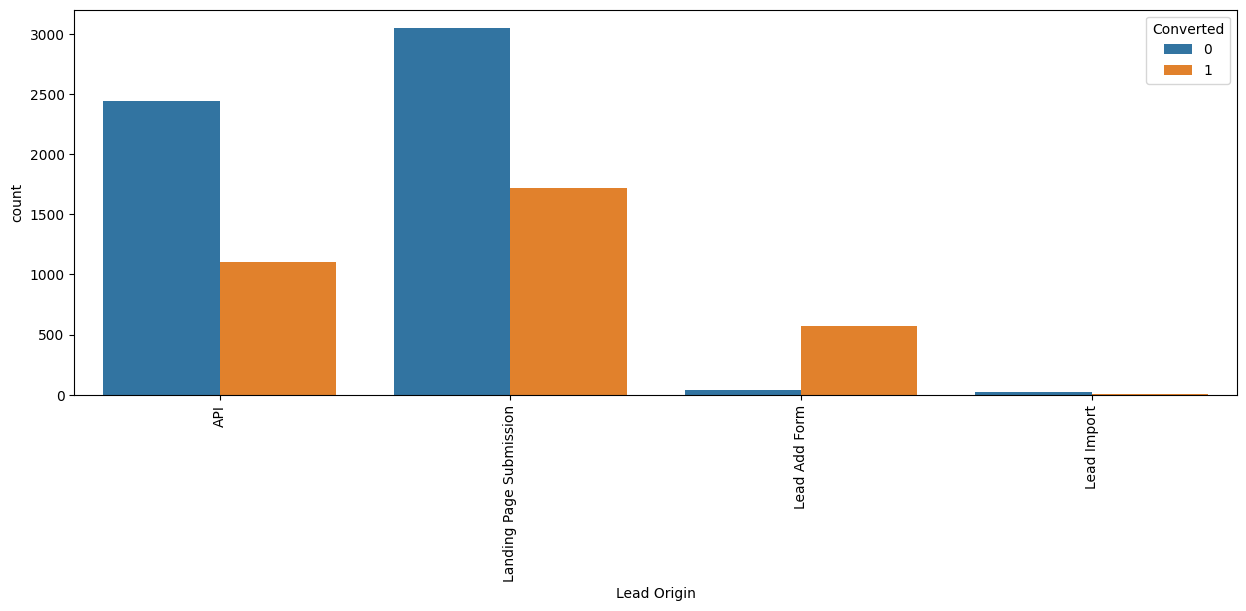

In [3142]:
# Let's check the column 'Lead Origin'
value_count_and_plot_graph('Lead Origin')

**Insights:**

* 'API' and 'Landing Page Submissinn' have both high number or leads and conversion rate.
* 'Lead Add Form' has a very high conversion rate as compared to the number of leads they have.
* 'Leads Import' have very few leads

**Recommendation:**

In order to improve overall lead conversion rate we need to the below steps:
* Improve lead converion of API and Landing Page Submission.
* Generate more leads from Lead Add Form as this has a very high conversion rate.

##### Do Not Email

******************************************************************************************** 

Do Not Email
No     92.2149
Yes     7.7851
Name: proportion, dtype: float64 



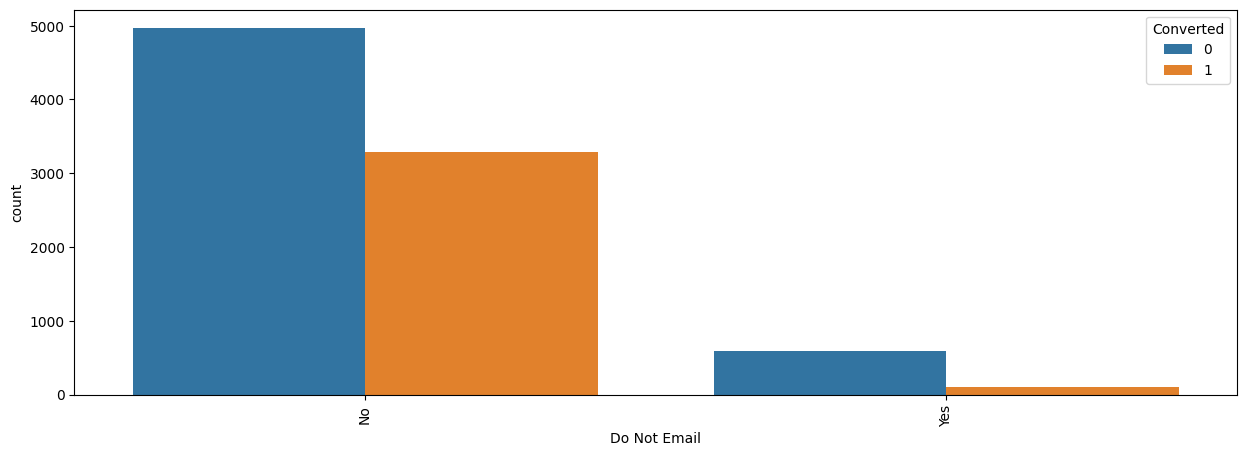

In [3143]:
# Let's check the column 'Do Not Email'
value_count_and_plot_graph('Do Not Email')

**Insights:**
* 92% of the people dont want to be emailed about the course.

##### Do Not Call

******************************************************************************************** 

Do Not Call
No     99.977661
Yes     0.022339
Name: proportion, dtype: float64 



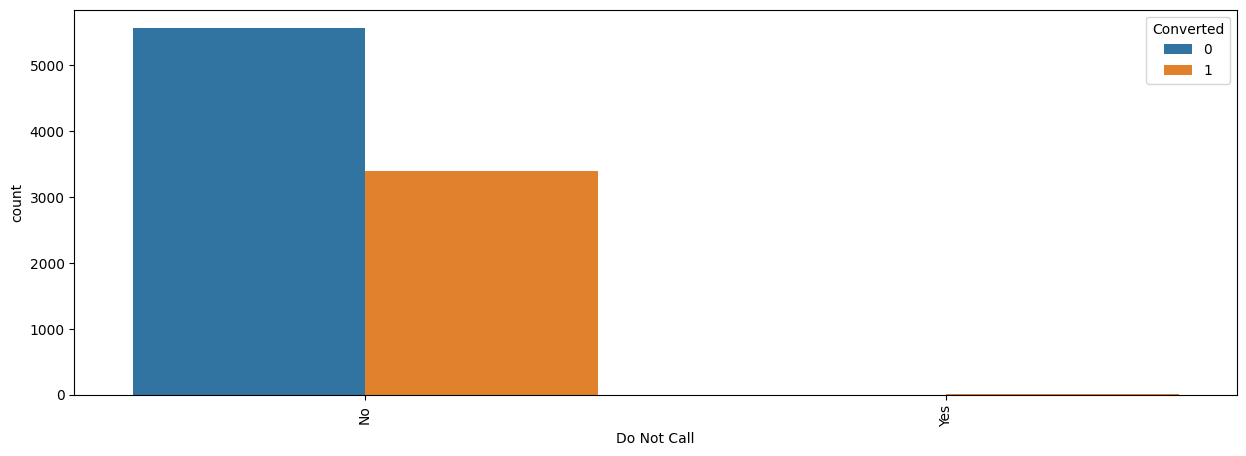

In [3144]:
# Let's check the column 'Do Not Call'
value_count_and_plot_graph('Do Not Call')

**Insights:**<br>
We can see from the value count data that 'No' is having more than 99.9% of the data. We can safely drop this column, as this will not add much to the analysis.

In [3145]:
# Add 'Do Not Call' column to columns to be dropped list
col_to_drop.append('Do Not Call')
print(f'List of columns that needs to be dropped : {col_to_drop}. \n')

List of columns that needs to be dropped : ['Country', 'What matters most to you in choosing a course', 'Do Not Call']. 



##### Search, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations

******************************************************************************************** 

Search
No     99.854797
Yes     0.145203
Name: proportion, dtype: float64 



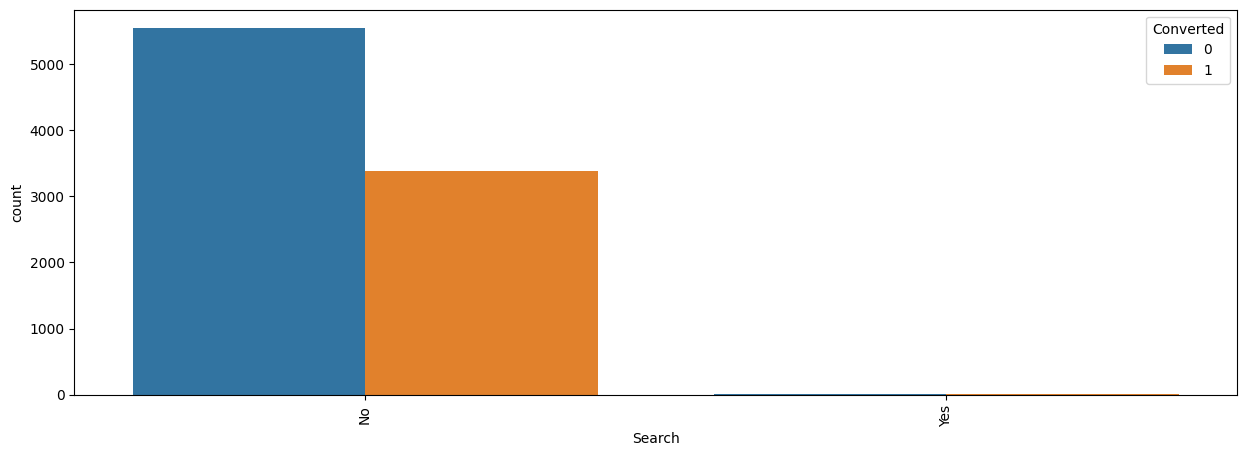

******************************************************************************************** 

Newspaper Article
No     99.988831
Yes     0.011169
Name: proportion, dtype: float64 



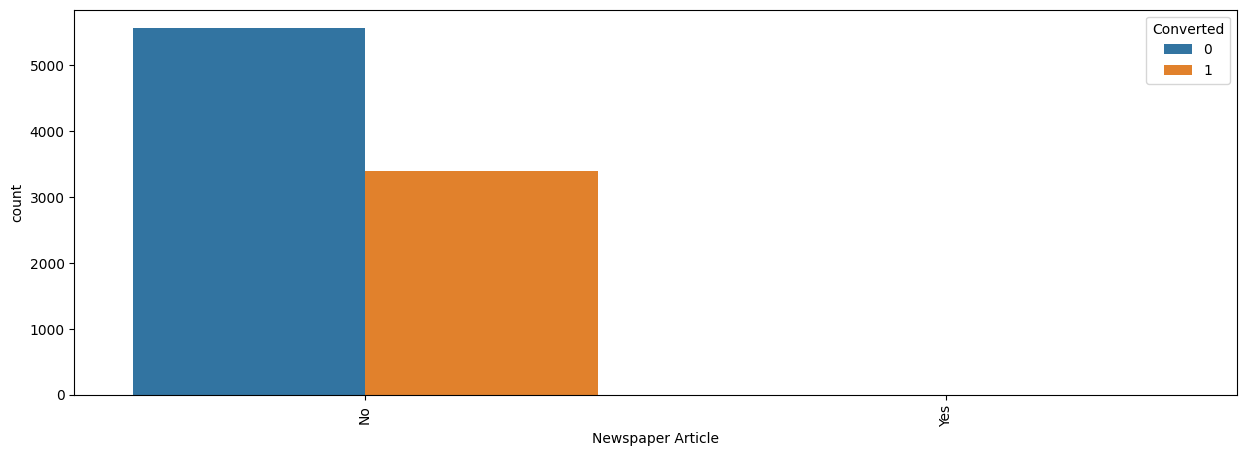

******************************************************************************************** 

X Education Forums
No    100.0
Name: proportion, dtype: float64 



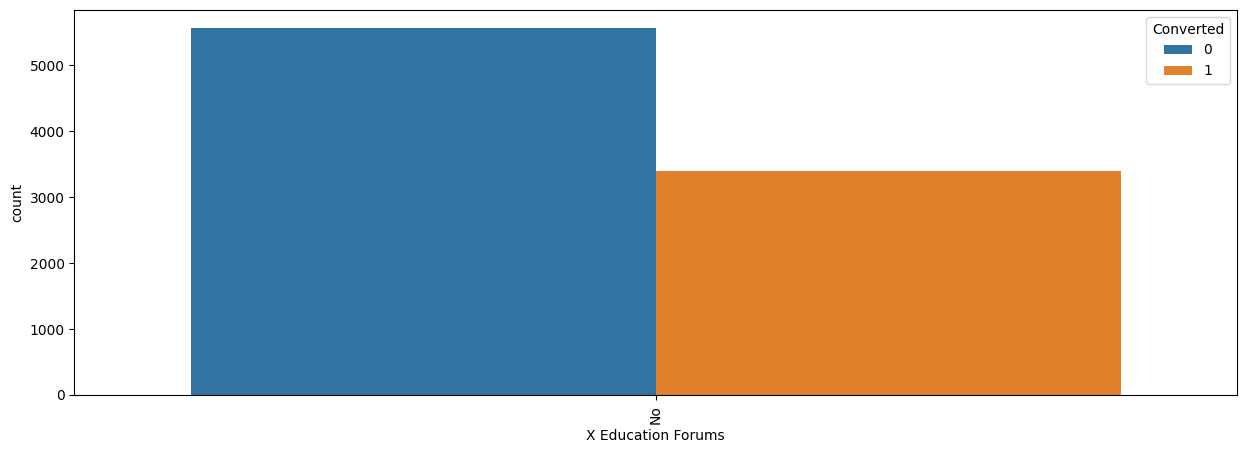

******************************************************************************************** 

Newspaper
No     99.988831
Yes     0.011169
Name: proportion, dtype: float64 



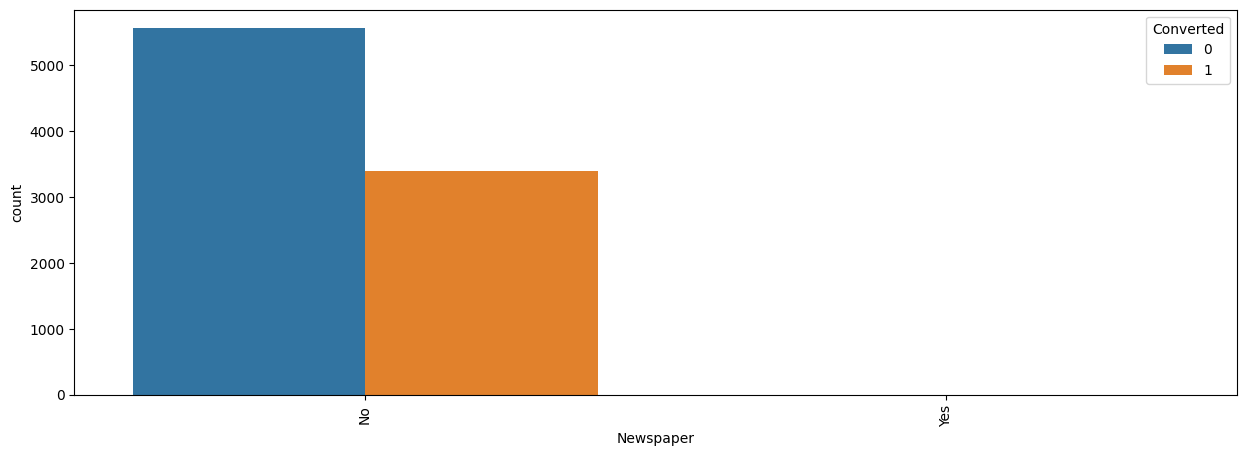

******************************************************************************************** 

Digital Advertisement
No     99.966492
Yes     0.033508
Name: proportion, dtype: float64 



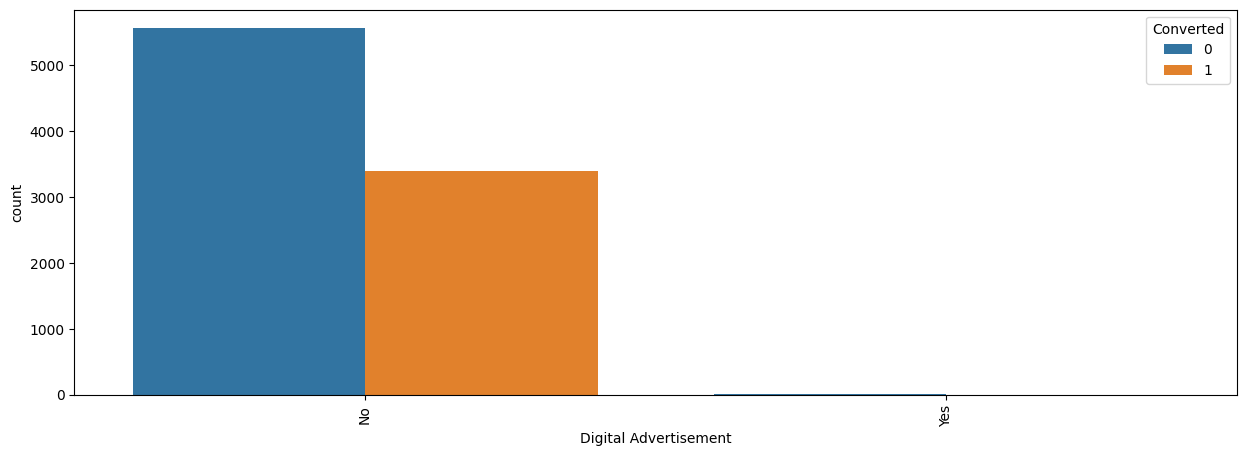

******************************************************************************************** 

Through Recommendations
No     99.932983
Yes     0.067017
Name: proportion, dtype: float64 



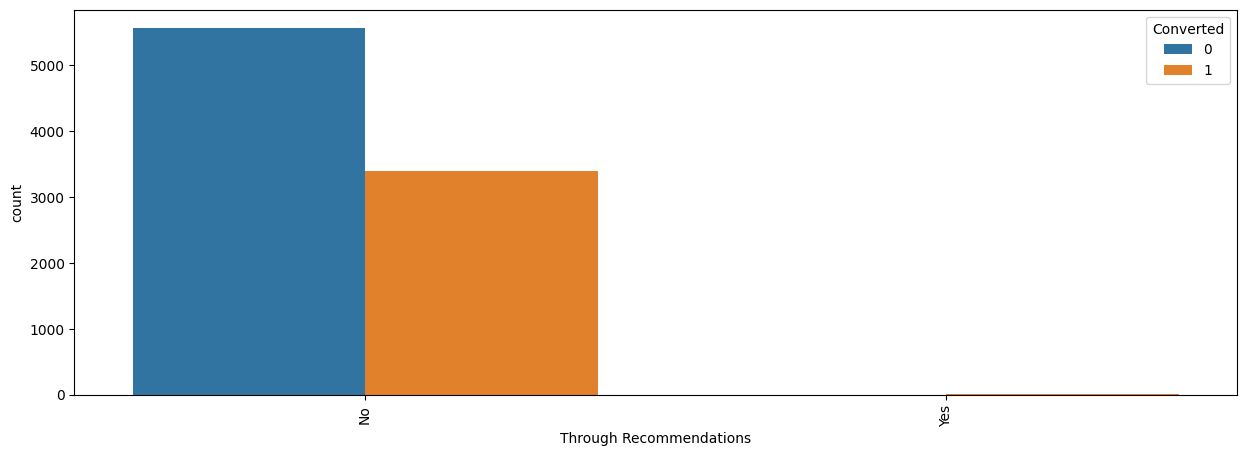

In [3146]:
# Let's check the remaining columns:

cols_to_check = ['Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
                 'Digital Advertisement', 'Through Recommendations']

for col in cols_to_check:
    value_count_and_plot_graph(col)

**Insights:**<br>
* We can see from the value count data that 'No' is having more than 99% of the data for all columns. We can safely drop these column, as this will not add much to the analysis.

In [3147]:
# Add the column to drop to the list
col_to_drop.extend(cols_to_check)
print(f'List of columns that needs to be dropped : {col_to_drop}. \n')

List of columns that needs to be dropped : ['Country', 'What matters most to you in choosing a course', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations']. 



##### A free copy of Mastering The Interview

******************************************************************************************** 

A free copy of Mastering The Interview
No     68.747906
Yes    31.252094
Name: proportion, dtype: float64 



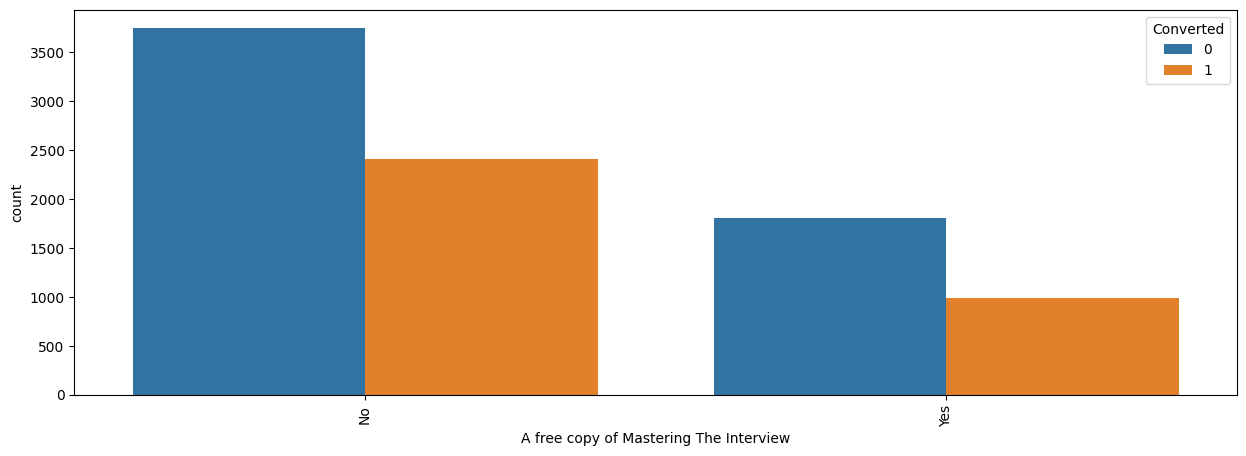

In [3148]:
# Let's check the column 'A free copy of Mastering The Interview'
value_count_and_plot_graph('A free copy of Mastering The Interview')

**Insights:**<br>
The number of leads who do not ask for the free copy are high. This group can be focused for conversion.

##### Last Notable Activity

******************************************************************************************** 

Last Notable Activity
Modified                        36.010276
Email Opened                    31.151569
SMS Sent                        23.936111
Page Visited on Website          3.216799
Olark Chat Conversation          2.032838
Email Link Clicked               1.898805
Email Bounced                    0.658997
Unsubscribed                     0.513794
Unreachable                      0.357422
Had a Phone Conversation         0.145203
Email Marked Spam                0.022339
Approached upfront               0.011169
Resubscribed to emails           0.011169
View in browser link Clicked     0.011169
Form Submitted on Website        0.011169
Email Received                   0.011169
Name: proportion, dtype: float64 



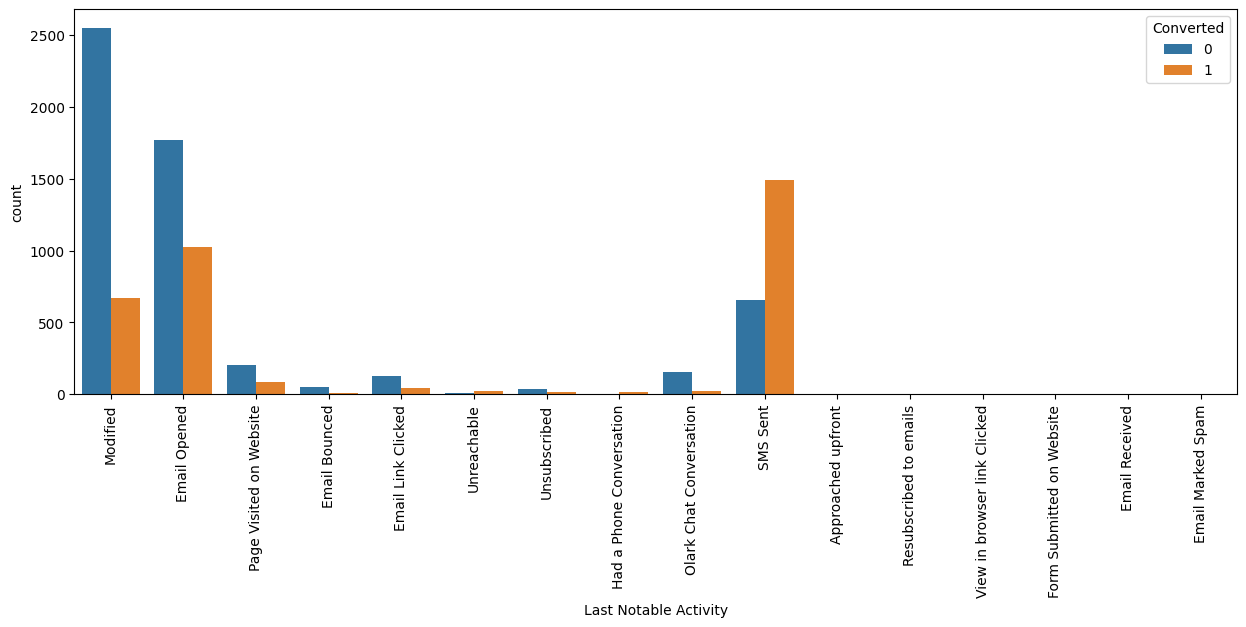

In [3149]:
# Let's check the column 'Last Notable Activity'
value_count_and_plot_graph('Last Notable Activity')

In [3150]:
# Let's categorize low frequency values to a single category 'Others'

lead_df['Last Notable Activity'] = lead_df['Last Notable Activity'].replace(
    ['Email Bounced', 'Unsubscribed', 'Unreachable', 'Had a Phone Conversation', 
     'Email Marked Spam', 'Approached upfront', 'Resubscribed to emails', 
     'View in browser link Clicked', 'Form Submitted on Website', 'Email Received'], 'Others')

******************************************************************************************** 

Last Notable Activity
Modified                   36.010276
Email Opened               31.151569
SMS Sent                   23.936111
Page Visited on Website     3.216799
Olark Chat Conversation     2.032838
Email Link Clicked          1.898805
Others                      1.753602
Name: proportion, dtype: float64 



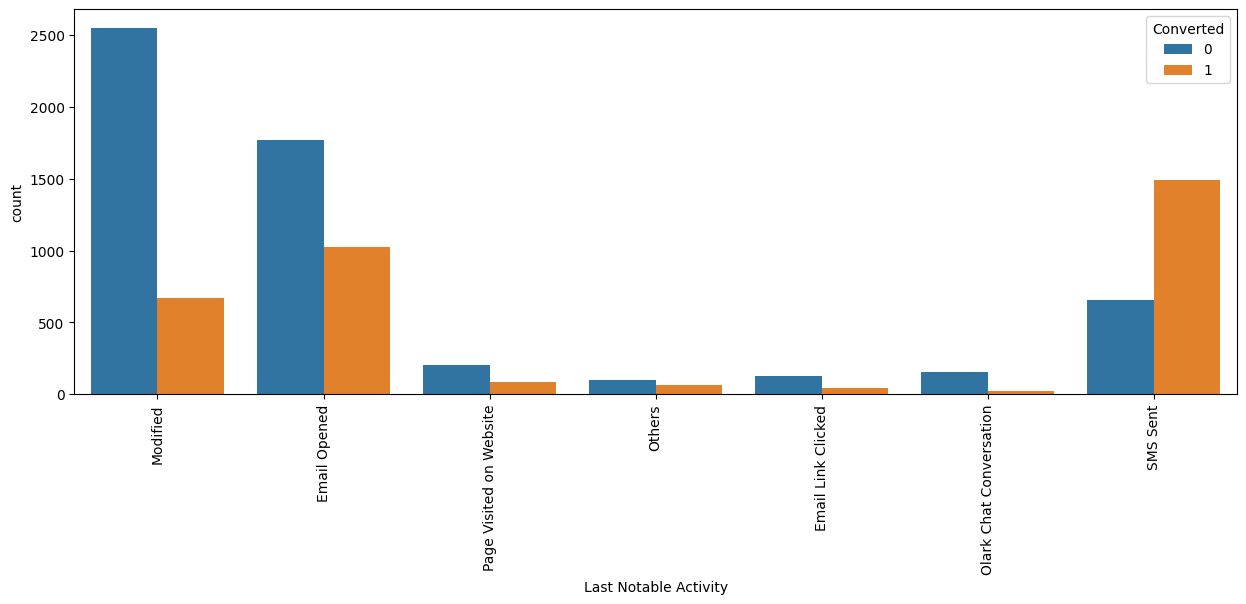

In [3151]:
# Let's check the value count and the corresponding countplot
value_count_and_plot_graph('Last Notable Activity')

**Insights:**
* 'Modified' and 'Email Opened' have high number of leads. This section can be targeted to increase the conversion rate.
* SMS sent have high converison rate

In [3152]:
# Let's drop the redundant columns
lead_df.drop(columns=col_to_drop, axis=1, inplace=True)

In [3153]:
# Check the info after deleting the columns
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8953 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8953 non-null   object 
 1   Lead Source                             8953 non-null   object 
 2   Do Not Email                            8953 non-null   object 
 3   Converted                               8953 non-null   int64  
 4   TotalVisits                             8953 non-null   float64
 5   Total Time Spent on Website             8953 non-null   int64  
 6   Page Views Per Visit                    8953 non-null   float64
 7   Last Activity                           8953 non-null   object 
 8   Specialization                          8953 non-null   object 
 9   What is your current occupation         8953 non-null   object 
 10  Tags                                    8953 non-null   object 
 

In [3154]:
# Get the dataset details using head()
lead_df.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity                 Specialization  \
0  Page Visited on Website       Marketing Specialization   
1             Email Opened       Marketing Specialization   
2             Email Opened  Administration Specialization   
3              Unreachable        Industry Specialization   
4        Converted to Lead       Marketing Specialization   

  What is your current occupation                                 Tags  \
0                      Unemployed                               Others   
1                      Unemployed                              Ringing   
2                         Student  Will revert after reading the email   
3                      Unemployed                              Ringing   
4                      Unemployed  Will revert after reading the email   

     City A free copy of Mastering The Interview Last Notable Activity  
0  Mumbai                                     No              Modified  
1  Mumbai                                     No          Email Opened  
2  Mumbai                                    Yes          Email Opened  
3  Mumbai                                     No              Modified  
4  Mumbai                                     No              Modified

## EXPLORATORY DATA ANALYSIS

**Target variable: 'Converted'**

The target variable indicates whether a lead has been successfully converted or not.<br>
0: Not converted into lead.<br>
1: Successfully Converted into lead.

### Check Value Count and Distribution for target variable 'Converted'

******************************************************************************************** 

Converted
0    62.07975
1    37.92025
Name: proportion, dtype: float64 



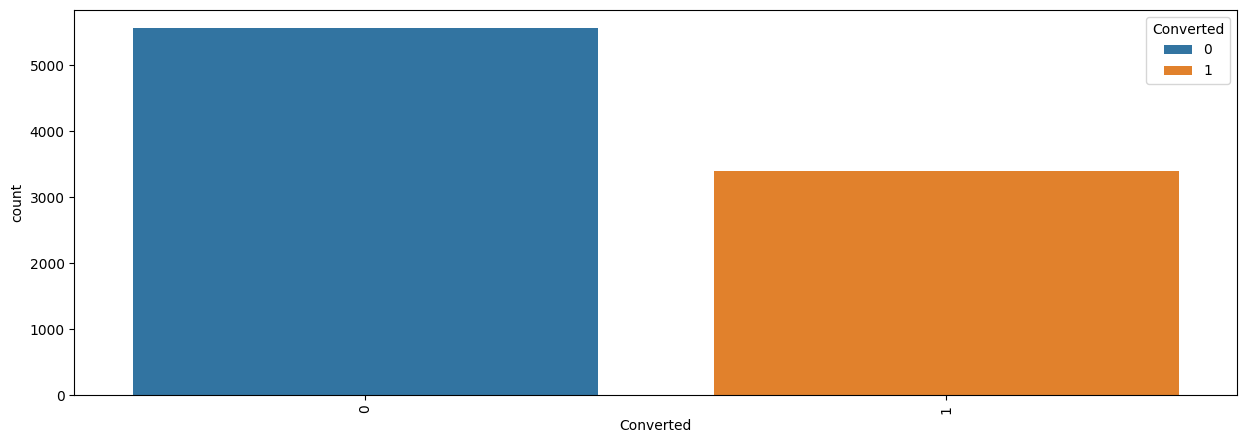

In [3155]:
# Let's check the target variable: Converted
value_count_and_plot_graph('Converted')

In [3156]:
# Check the imbalance ratio
(lead_df.Converted==1).sum()/(lead_df.Converted==0).sum()

0.610831234256927

**Insights:**
* From value count and count plot we can see that data is properly balanced.
* Imbalance ratio: 61.08%

### Check Lead Conversion Rate

In [3157]:
# Let's check the percent of data that has converted value
converted = sum(lead_df['Converted'])/len(lead_df['Converted'])*100
print(f'Lead conversion rate is: {converted}\n')

Lead conversion rate is: 37.92025019546521



**Insights:**

**Conversion rate is 37.92%**, meaning only 37.92% of the people have converted to leads.(Minority)<br>
While remaining 62.08% of the people didnt convert to leads.(Majority)

### Bi-Variate Analysis for numerical columns

#### Pair Plots

<Figure size 1500x500 with 0 Axes>

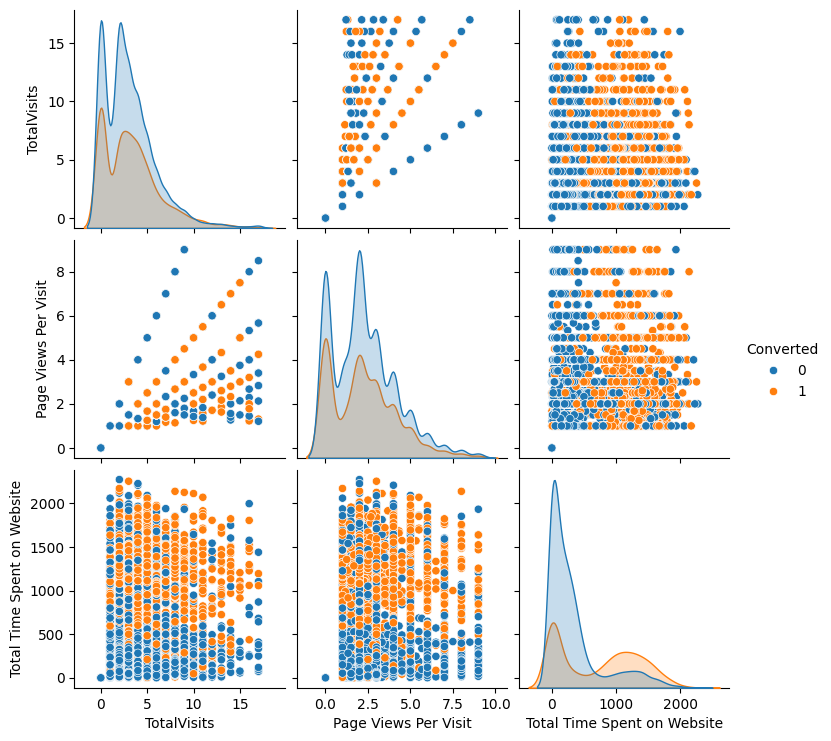

In [3158]:
num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]
plt.figure(figsize=(15, 5))
sns.pairplot(data=lead_df, vars=num_cols, hue="Converted")                                  
plt.show()

#### Check correlation between the numerical columns

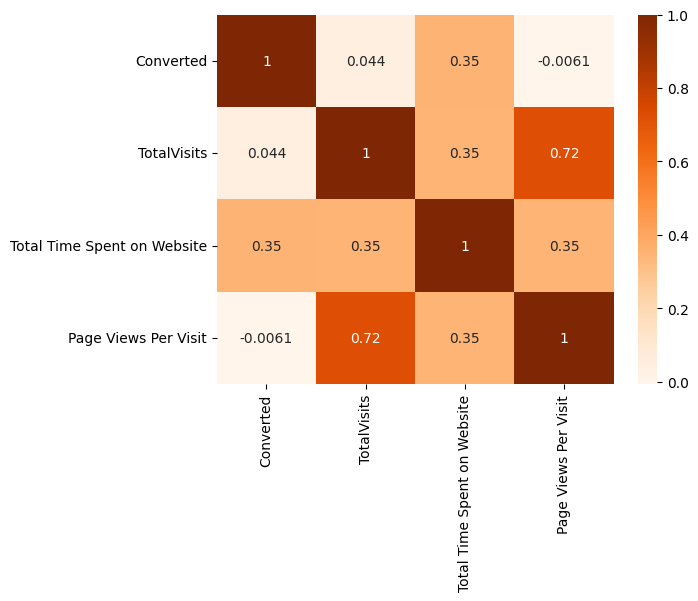

In [3159]:
# Let's check the correlation between the numerical columns

sns.heatmap(lead_df.corr(numeric_only=True), cmap='Oranges', annot=True)
plt.show()

**Insights:**
* 'TotalVisits' and 'Page Views Per Visit' have a high correlation index of 0.72
* 'Total Time Spent on Website' has a correlation index of 0.35 with target variable 'Converted'
* All other numnerical columns have low correlation with target variable 'Converted'

#### 'TotalVisits' Vs 'Converted'

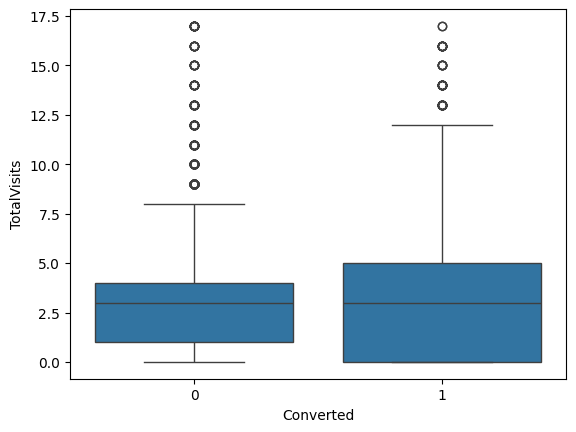

In [3160]:
# Plot a graph of 'TotalVisits' Vs 'Converted'
sns.boxplot(x='Converted', y='TotalVisits', data=lead_df)
plt.show()

**Insights:**
* From the above boxplot we can see that the median for both converted and not converted leads are the same.

#### 'Total Time Spent on Website' Vs 'Coverted'

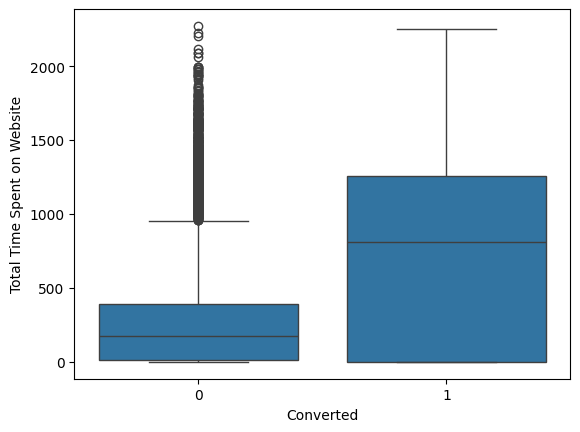

In [3161]:
# Plot a graph of 'Total Time Spent on Website' Vs 'Coverted'

sns.boxplot(x='Converted', y='Total Time Spent on Website', data=lead_df)
plt.show()

**Insights:**
* From the above boxplot we can see that the leads spending more time on the website are more likely to opt for the courses

#### 'Page Views Per Visit' Vs 'Converted'

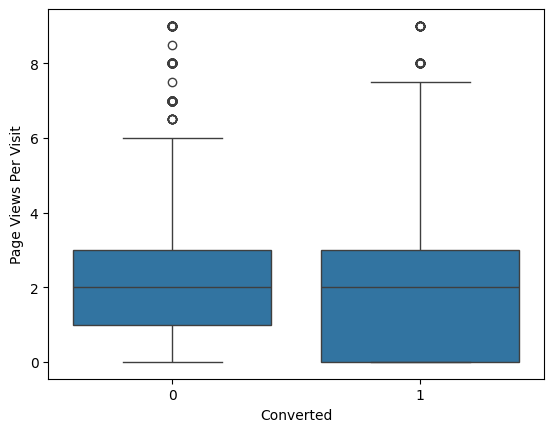

In [3162]:
# Plot graph of 'Page Views Per Visit' Vs 'Converted'
sns.boxplot(x='Converted', y='Page Views Per Visit', data=lead_df)
plt.show()

**Insights:**<br>
From the above boxplot we can see that the median for both converted and not converted are the same.

## DATA PREPARATION

In [3163]:
# Check the dataset details by using head()
lead_df.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity                 Specialization  \
0  Page Visited on Website       Marketing Specialization   
1             Email Opened       Marketing Specialization   
2             Email Opened  Administration Specialization   
3              Unreachable        Industry Specialization   
4        Converted to Lead       Marketing Specialization   

  What is your current occupation                                 Tags  \
0                      Unemployed                               Others   
1                      Unemployed                              Ringing   
2                         Student  Will revert after reading the email   
3                      Unemployed                              Ringing   
4                      Unemployed  Will revert after reading the email   

     City A free copy of Mastering The Interview Last Notable Activity  
0  Mumbai                                     No              Modified  
1  Mumbai                                     No          Email Opened  
2  Mumbai                                    Yes          Email Opened  
3  Mumbai                                     No              Modified  
4  Mumbai                                     No              Modified

### Converting Binary Variables

In [3164]:
''' From the above table it can be seen that 'Do Not Email' and 'A free copy of Mastering The Interview' 
are binary columns and these should be converted to 0/1.'''

# Code Block to convert the binary columns to 0/1
binary_cols = ['Do Not Email', 'A free copy of Mastering The Interview']
for col in binary_cols:
    lead_df[col] = lead_df[col].map({'Yes': 1, 'No': 0})

### Dummy Variable Creation

In [3165]:
# Get the list of categorical columns, for dummy variable creation
cat_cols = lead_df.select_dtypes(include=['object']).columns
print(f'The list of categorical columns for dummy variable creation are: {cat_cols}.\n')

The list of categorical columns for dummy variable creation are: Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'City',
       'Last Notable Activity'],
      dtype='object').



In [3166]:
''' Let's create dummy variables for categorical columns and drop the 
first column for each category using drop_first=True.'''

dummy = pd.get_dummies(lead_df[cat_cols], drop_first=True, dtype='int')
dummy.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
0                        0                     0                   0   
1                        0                     0                   0   
2                        0                     0                   0   
3                        0                     0                   0   
4                        0                     0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
0                       1                           0                   0   
1                       0                           1                   0   
2                       0                           0                   0   
3                       0                           0                   0   
4                       0                           0                   0   

   Lead Source_Reference  Lead Source_Referral Sites  ...  \
0                      0                           0  ...   
1                      0                           0  ...   
2                      0                           0  ...   
3                      0                           0  ...   
4                      0                           0  ...   

   City_Other Cities of Maharashtra  City_Other Metro Cities  \
0                                 0                        0   
1                                 0                        0   
2                                 0                        0   
3                                 0                        0   
4                                 0                        0   

   City_Thane & Outskirts  City_Tier II Cities  \
0                       0                    0   
1                       0                    0   
2                       0                    0   
3                       0                    0   
4                       0                    0   

   Last Notable Activity_Email Opened  Last Notable Activity_Modified  \
0                                   0                               1   
1                                   1                               0   
2                                   1                               0   
3                                   0                               1   
4                                   0                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Others  \
0                             0   
1                             0   
2                             0   
3                             0   
4                             0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_SMS Sent  
0                               0  
1                               0  
2                               0  
3                               0  
4                               0  

[5 rows x 44 columns]

In [3167]:
# Let's concat the dummy dataset with the lead score dataset
lead_df = pd.concat([dummy, lead_df], axis=1)
lead_df.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
0                        0                     0                   0   
1                        0                     0                   0   
2                        0                     0                   0   
3                        0                     0                   0   
4                        0                     0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
0                       1                           0                   0   
1                       0                           1                   0   
2                       0                           0                   0   
3                       0                           0                   0   
4                       0                           0                   0   

   Lead Source_Reference  Lead Source_Referral Sites  ...  TotalVisits  \
0                      0                           0  ...          0.0   
1                      0                           0  ...          5.0   
2                      0                           0  ...          2.0   
3                      0                           0  ...          1.0   
4                      0                           0  ...          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

                  Specialization  What is your current occupation  \
0       Marketing Specialization                       Unemployed   
1       Marketing Specialization                       Unemployed   
2  Administration Specialization                          Student   
3        Industry Specialization                       Unemployed   
4       Marketing Specialization                       Unemployed   

                                  Tags    City  \
0                               Others  Mumbai   
1                              Ringing  Mumbai   
2  Will revert after reading the email  Mumbai   
3                              Ringing  Mumbai   
4  Will revert after reading the email  Mumbai   

   A free copy of Mastering The Interview  Last Notable Activity  
0                                       0               Modified  
1                                       0           Email Opened  
2                                       1           Email Opened  
3                                       0               Modified  
4                                       0               Modified  

[5 rows x 58 columns]

In [3168]:
# Check the columns
lead_df.columns

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Specialization_Industry Specialization',
       'Specialization_Marketing Specialization',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current

In [3169]:
# Dropping the columns for which the dummy variables are created.
lead_df.drop(columns=cat_cols, axis=1, inplace=True)

In [3170]:
# Check the dataset details using head()
lead_df.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
0                        0                     0                   0   
1                        0                     0                   0   
2                        0                     0                   0   
3                        0                     0                   0   
4                        0                     0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
0                       1                           0                   0   
1                       0                           1                   0   
2                       0                           0                   0   
3                       0                           0                   0   
4                       0                           0                   0   

   Lead Source_Reference  Lead Source_Referral Sites  ...  \
0                      0                           0  ...   
1                      0                           0  ...   
2                      0                           0  ...   
3                      0                           0  ...   
4                      0                           0  ...   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Others  \
0                             0   
1                             0   
2                             0   
3                             0   
4                             0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_SMS Sent  Do Not Email  Converted  TotalVisits  \
0                               0             0          0          0.0   
1                               0             0          0          5.0   
2                               0             0          1          2.0   
3                               0             0          0          1.0   
4                               0             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  \
0                            0                   0.0   
1                          674                   2.5   
2                         1532                   2.0   
3                          305                   1.0   
4                         1428                   1.0   

   A free copy of Mastering The Interview  
0                                       0  
1                                       0  
2                                       1  
3                                       0  
4                                       0  

[5 rows x 50 columns]

In [3171]:
# Let's check the dtypes
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8953 entries, 0 to 9239
Data columns (total 50 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Origin_Landing Page Submission                   8953 non-null   int64  
 1   Lead Origin_Lead Add Form                             8953 non-null   int64  
 2   Lead Origin_Lead Import                               8953 non-null   int64  
 3   Lead Source_Facebook                                  8953 non-null   int64  
 4   Lead Source_Google                                    8953 non-null   int64  
 5   Lead Source_Olark Chat                                8953 non-null   int64  
 6   Lead Source_Organic Search                            8953 non-null   int64  
 7   Lead Source_Others                                    8953 non-null   int64  
 8   Lead Source_Reference                                 8953 non-

**Insights:**
* All the columns are converted to numeric type i.e, int or float
* There are no null values

## TRAIN-TEST SPLIT

In [3172]:
# Get independant variables (X) and target variable (y) for the dataset
y = lead_df['Converted']
X = lead_df.drop(columns=['Converted'], axis=1)

In [3173]:
# Print the target variable details
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [3174]:
# Print the independant variable details
X.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
0                        0                     0                   0   
1                        0                     0                   0   
2                        0                     0                   0   
3                        0                     0                   0   
4                        0                     0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
0                       1                           0                   0   
1                       0                           1                   0   
2                       0                           0                   0   
3                       0                           0                   0   
4                       0                           0                   0   

   Lead Source_Reference  Lead Source_Referral Sites  ...  \
0                      0                           0  ...   
1                      0                           0  ...   
2                      0                           0  ...   
3                      0                           0  ...   
4                      0                           0  ...   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Others  \
0                             0   
1                             0   
2                             0   
3                             0   
4                             0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_SMS Sent  Do Not Email  TotalVisits  \
0                               0             0          0.0   
1                               0             0          5.0   
2                               0             0          2.0   
3                               0             0          1.0   
4                               0             0          2.0   

   Total Time Spent on Website  Page Views Per Visit  \
0                            0                   0.0   
1                          674                   2.5   
2                         1532                   2.0   
3                          305                   1.0   
4                         1428                   1.0   

   A free copy of Mastering The Interview  
0                                       0  
1                                       0  
2                                       1  
3                                       0  
4                                       0  

[5 rows x 49 columns]

In [3175]:
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [3176]:
# Print the trainig dataset shape
print(f"Training dataset shape: \nX_train:, {X_train.shape},\ny_train:{y_train.shape}")

Training dataset shape: 
X_train:, (6267, 49),
y_train:(6267,)


In [3177]:
# Print the testing dataset shape
print(f"Testing dataset shape: \nX_test:, {X_test.shape},\ny_train:{y_test.shape}")

Testing dataset shape: 
X_test:, (2686, 49),
y_train:(2686,)


## FEATURE SCALING

In [3178]:
# Create an instance of StandardScaler
scaler = StandardScaler()

# Let's standardize the numerical columns
num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

# Get the dataset details using head()
X_train.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
3385                             0.937636                  -0.280790   
2273                            -1.066512                   3.561377   
4234                             0.937636                  -0.280790   
945                             -1.066512                  -0.280790   
8689                            -1.066512                  -0.280790   

      Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
3385                -0.062002             -0.062002           -0.682867   
2273                -0.062002             -0.062002           -0.682867   
4234                -0.062002             -0.062002            1.464413   
945                 -0.062002             -0.062002            1.464413   
8689                -0.062002             -0.062002           -0.682867   

      Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
3385               -0.489155                   -0.368426           -0.050592   
2273               -0.489155                   -0.368426           -0.050592   
4234               -0.489155                   -0.368426           -0.050592   
945                -0.489155                   -0.368426           -0.050592   
8689                2.044343                   -0.368426           -0.050592   

      Lead Source_Reference  Lead Source_Referral Sites  ...  \
3385              -0.240624                   -0.117259  ...   
2273               4.155856                   -0.117259  ...   
4234              -0.240624                   -0.117259  ...   
945               -0.240624                   -0.117259  ...   
8689              -0.240624                   -0.117259  ...   

      Last Notable Activity_Modified  \
3385                        1.332005   
2273                        1.332005   
4234                       -0.750748   
945                         1.332005   
8689                       -0.750748   

      Last Notable Activity_Olark Chat Conversation  \
3385                                      -0.144396   
2273                                      -0.144396   
4234                                      -0.144396   
945                                       -0.144396   
8689                                      -0.144396   

      Last Notable Activity_Others  \
3385                     -0.136723   
2273                     -0.136723   
4234                     -0.136723   
945                      -0.136723   
8689                     -0.136723   

      Last Notable Activity_Page Visited on Website  \
3385                                      -0.179679   
2273                                      -0.179679   
4234                                      -0.179679   
945                                       -0.179679   
8689                                      -0.179679   

      Last Notable Activity_SMS Sent  Do Not Email  TotalVisits  \
3385                       -0.561194     -0.291881    -0.387896   
2273                       -0.561194     -0.291881    -1.078701   
4234                        1.781914     -0.291881     0.302909   
945                        -0.561194     -0.291881    -0.042493   
8689                       -0.561194     -0.291881    -1.078701   

      Total Time Spent on Website  Page Views Per Visit  \
3385                    -0.352398             -0.125473   
2273                    -0.882395             -1.191680   
4234                    -0.678832              0.940734   
945                     -0.121327              0.407631   
8689                    -0.882395             -1.191680   

      A free copy of Mastering The Interview  
3385                                1.475256  
2273                               -0.677848  
4234                                1.475256  
945                                -0.677848  
8689                               -0.677848  

[5 rows x 49 columns]

### Check the correlation matrix

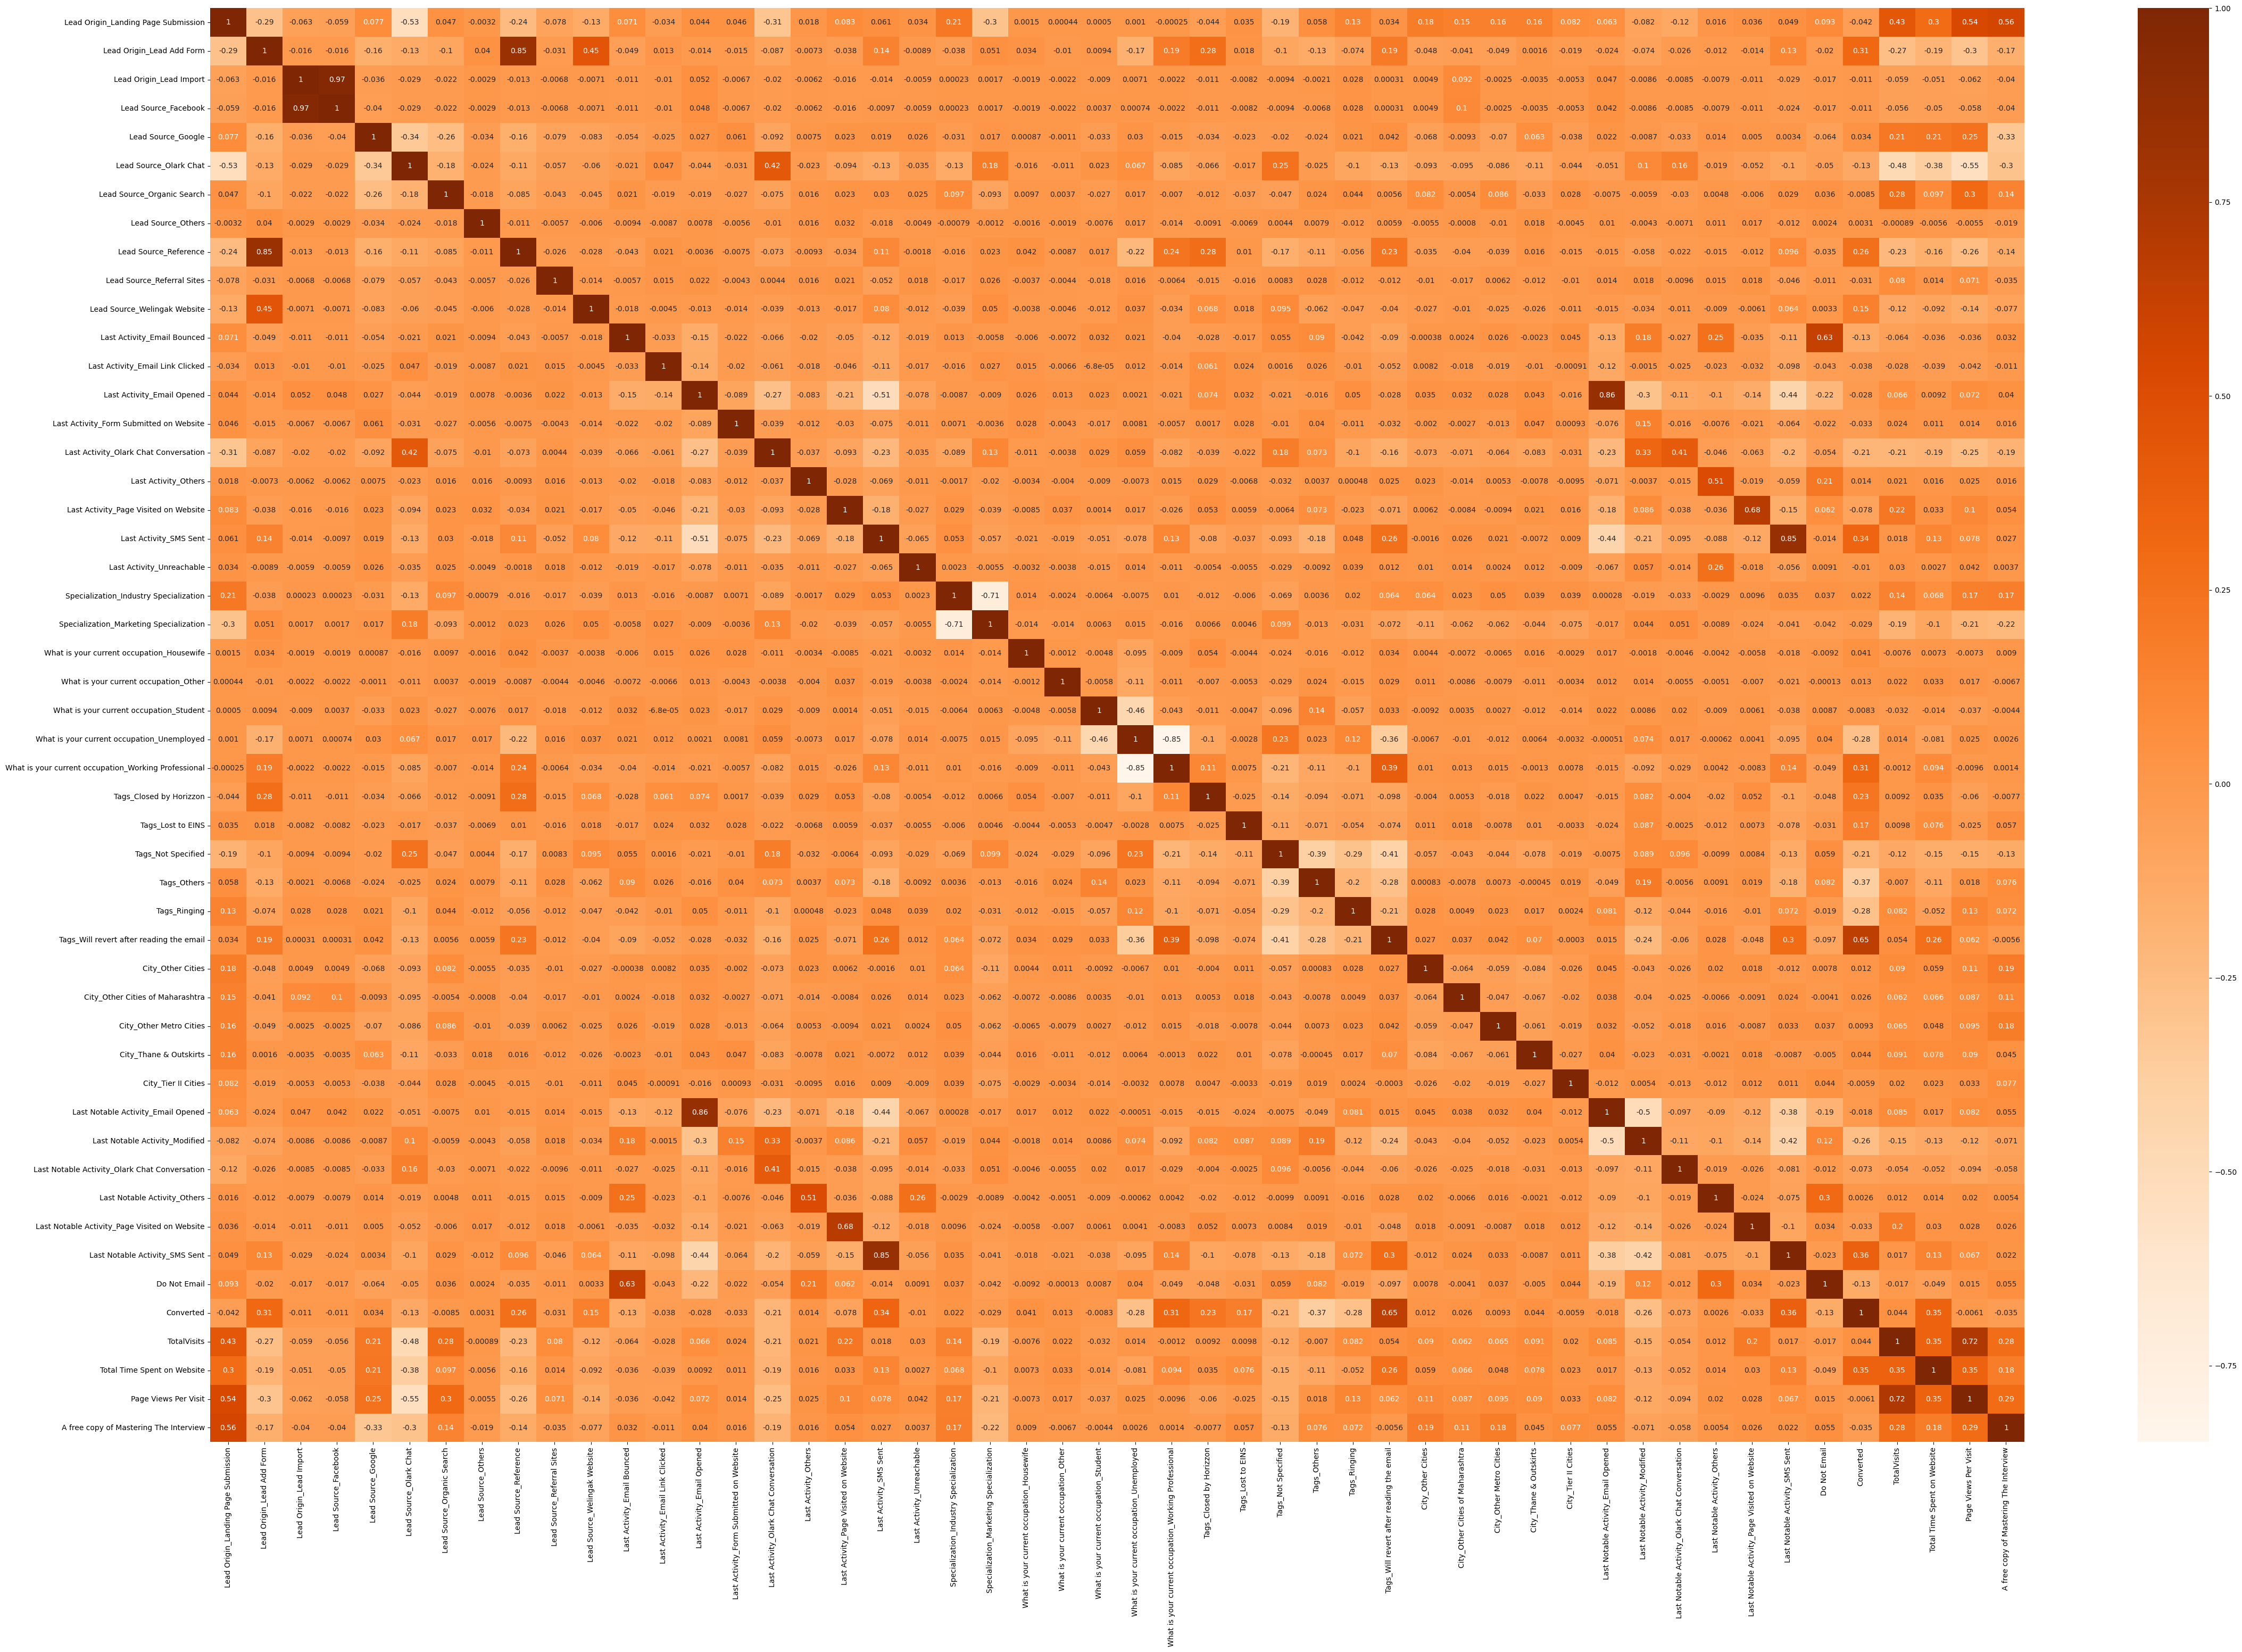

In [3179]:
# Plot heatmap for numerical columns
plt.figure(figsize = (55, 35))
sns.heatmap(lead_df.corr(numeric_only=True), cmap='Oranges', annot=True)
plt.show()

**Insights:** 

* 'Lead Source_Facebook' and 'Lead Origin_Lead Import' have high correlation of 0.98.
* 'Lead Origin_Lead Add Form' and 'Lead Source_Referance' have high correlation of 0.85.
* 'TotalVisits' and 'Page Views Per Visit' have correlation of 0.72.
* 'Lead Origin_Lead Add Form' ,'Lead Source_Welingak Website', 'Last Activity_SMS Sent' and 'What is your current Occupation_Working Professionals' have positive correlation with the target variable 'Converted'.

## MODEL BUILDING

In [3180]:
# Let's start model building using Stats Model and RFE

regressor = LogisticRegression()
rfe = RFE(regressor, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [3181]:
rfe.support_

array([ True,  True, False, False, False,  True, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False,  True, False, False])

In [3182]:
# Checking the columns selected by RFE and their weightage
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 12),
 ('Lead Source_Facebook', False, 13),
 ('Lead Source_Google', False, 11),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 19),
 ('Lead Source_Others', False, 23),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 31),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 17),
 ('Last Activity_Email Link Clicked', False, 10),
 ('Last Activity_Email Opened', False, 5),
 ('Last Activity_Form Submitted on Website', False, 15),
 ('Last Activity_Olark Chat Conversation', False, 21),
 ('Last Activity_Others', False, 32),
 ('Last Activity_Page Visited on Website', False, 35),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 20),
 ('Specialization_Industry Specialization', False, 24),
 ('Specialization_Marketing Specialization', False, 25),
 ('What is yo

In [3183]:
# Save the list of columns selected by RFE for further processing
rfe_cols = X_train.columns[rfe.support_]
print(f'Columns seleted by RFE are:\n{rfe_cols}.\n')

Columns seleted by RFE are:
Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Not Specified',
       'Tags_Others', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_SMS Sent',
       'Total Time Spent on Website'],
      dtype='object').



In [3184]:
# List of columns not selected 
print(f'List of columns not selected by RFE are:\n{X_train.columns[~rfe.support_]}')

List of columns not selected by RFE are:
Index(['Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Specialization_Industry Specialization',
       'Specialization_Marketing Specialization',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Out

In [3185]:
# Creating utility function to build and fit the model

def build_model(dataframe):
    
    # Add constant
    X_train_sm = sm.add_constant(dataframe)
    
    # Build and return the fitted model
    log_model = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
    reg = log_model.fit()
    print("Logistic Regression Model is : \n", reg.summary())
    return reg

In [3186]:
# Creating utility function to check multicollinearity i.e Variance Inflation Factor

def calculate_vif(dataframe):
    vif = pd.DataFrame()
    vif['Features'] = dataframe.columns
    vif['VIF'] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [3187]:
# Creating new dataframe to save the data for the features selected by RFE
X_train_rfe = X_train[rfe_cols]

In [3188]:
# Printing the shape of X_train_rfe
X_train_rfe.shape

(6267, 15)

### Model 1: Using the columns selected by RFE

In [3189]:
# Let's build Model 1 using the columns selected by RFE and also check VIF.

model1 = build_model(X_train_rfe)
print("\nCalculating VIF \n")
calculate_vif(X_train_rfe)

Logistic Regression Model is : 
                  Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1238.7
Date:                Tue, 23 Jul 2024   Deviance:                       2477.3
Time:                        23:50:54   Pearson chi2:                 9.11e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6086
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------

Features    VIF
1                  Lead Origin_Lead Add Form  18.25
3                      Lead Source_Reference  14.55
8                         Tags_Not Specified  11.17
11  Tags_Will revert after reading the email   8.57
9                                Tags_Others   8.23
10                              Tags_Ringing   5.83
4               Lead Source_Welingak Website   4.76
5                     Last Activity_SMS Sent   4.16
13            Last Notable Activity_SMS Sent   3.97
6                    Tags_Closed by Horizzon   2.63
7                          Tags_Lost to EINS   1.85
2                     Lead Source_Olark Chat   1.83
0        Lead Origin_Landing Page Submission   1.74
14               Total Time Spent on Website   1.47
12        Last Notable Activity_Email Opened   1.33

### Model 2: Dropping 'Lead Source_Reference' as it is insignificant due to high p-value of 0.250

In [3190]:
# Drop 'Lead Source_Reference' as it has high p-value of 0.250
X_train_rfe.drop(columns=['Lead Source_Reference'], axis=1, inplace=True)

In [3191]:
# Let's check the head() and verify that the column was dropped.
X_train_rfe.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
3385                             0.937636                  -0.280790   
2273                            -1.066512                   3.561377   
4234                             0.937636                  -0.280790   
945                             -1.066512                  -0.280790   
8689                            -1.066512                  -0.280790   

      Lead Source_Olark Chat  Lead Source_Welingak Website  \
3385               -0.489155                     -0.121386   
2273               -0.489155                     -0.121386   
4234               -0.489155                     -0.121386   
945                -0.489155                     -0.121386   
8689                2.044343                     -0.121386   

      Last Activity_SMS Sent  Tags_Closed by Horizzon  Tags_Lost to EINS  \
3385               -0.653883                -0.187572           -0.13972   
2273                1.529326                 5.331279           -0.13972   
4234                1.529326                -0.187572           -0.13972   
945                -0.653883                -0.187572           -0.13972   
8689               -0.653883                -0.187572           -0.13972   

      Tags_Not Specified  Tags_Others  Tags_Ringing  \
3385            1.313761    -0.508612     -0.382808   
2273           -0.761173    -0.508612     -0.382808   
4234            1.313761    -0.508612     -0.382808   
945            -0.761173    -0.508612      2.612273   
8689           -0.761173     1.966134     -0.382808   

      Tags_Will revert after reading the email  \
3385                                 -0.537071   
2273                                 -0.537071   
4234                                 -0.537071   
945                                  -0.537071   
8689                                 -0.537071   

      Last Notable Activity_Email Opened  Last Notable Activity_SMS Sent  \
3385                           -0.673339                       -0.561194   
2273                           -0.673339                       -0.561194   
4234                           -0.673339                        1.781914   
945                            -0.673339                       -0.561194   
8689                            1.485135                       -0.561194   

      Total Time Spent on Website  
3385                    -0.352398  
2273                    -0.882395  
4234                    -0.678832  
945                     -0.121327  
8689                    -0.882395

In [3192]:
# Call function to build, fit and calculate VIF of the model
model2 = build_model(X_train_rfe)
print("\nCalculating VIF \n")
calculate_vif(X_train_rfe)

Logistic Regression Model is : 
                  Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1239.4
Date:                Tue, 23 Jul 2024   Deviance:                       2478.8
Time:                        23:50:54   Pearson chi2:                 9.25e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6085
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------

Features    VIF
7                         Tags_Not Specified  11.17
10  Tags_Will revert after reading the email   8.57
8                                Tags_Others   8.23
9                               Tags_Ringing   5.83
4                     Last Activity_SMS Sent   4.16
12            Last Notable Activity_SMS Sent   3.97
5                    Tags_Closed by Horizzon   2.62
1                  Lead Origin_Lead Add Form   1.97
6                          Tags_Lost to EINS   1.85
2                     Lead Source_Olark Chat   1.83
0        Lead Origin_Landing Page Submission   1.74
13               Total Time Spent on Website   1.47
11        Last Notable Activity_Email Opened   1.33
3               Lead Source_Welingak Website   1.29

**Insights:**<br>
All columns with insignificant p-vaues are dropped.<br>
Let's start check high values of VIF

### Model 3: Dropping 'Tags_Not Specified' as it has a very high VIF value of 11.17

In [3193]:
# Drop Tags_Not Specified as it has high VIF value of 11.17
X_train_rfe.drop(columns=['Tags_Not Specified'], axis=1, inplace=True)

In [3194]:
# Let's check the head() and verify that the column was dropped.
X_train_rfe.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
3385                             0.937636                  -0.280790   
2273                            -1.066512                   3.561377   
4234                             0.937636                  -0.280790   
945                             -1.066512                  -0.280790   
8689                            -1.066512                  -0.280790   

      Lead Source_Olark Chat  Lead Source_Welingak Website  \
3385               -0.489155                     -0.121386   
2273               -0.489155                     -0.121386   
4234               -0.489155                     -0.121386   
945                -0.489155                     -0.121386   
8689                2.044343                     -0.121386   

      Last Activity_SMS Sent  Tags_Closed by Horizzon  Tags_Lost to EINS  \
3385               -0.653883                -0.187572           -0.13972   
2273                1.529326                 5.331279           -0.13972   
4234                1.529326                -0.187572           -0.13972   
945                -0.653883                -0.187572           -0.13972   
8689               -0.653883                -0.187572           -0.13972   

      Tags_Others  Tags_Ringing  Tags_Will revert after reading the email  \
3385    -0.508612     -0.382808                                 -0.537071   
2273    -0.508612     -0.382808                                 -0.537071   
4234    -0.508612     -0.382808                                 -0.537071   
945     -0.508612      2.612273                                 -0.537071   
8689     1.966134     -0.382808                                 -0.537071   

      Last Notable Activity_Email Opened  Last Notable Activity_SMS Sent  \
3385                           -0.673339                       -0.561194   
2273                           -0.673339                       -0.561194   
4234                           -0.673339                        1.781914   
945                            -0.673339                       -0.561194   
8689                            1.485135                       -0.561194   

      Total Time Spent on Website  
3385                    -0.352398  
2273                    -0.882395  
4234                    -0.678832  
945                     -0.121327  
8689                    -0.882395

In [3195]:
# Call function to build, fit and calculate VIF of the model
model3 = build_model(X_train_rfe)
print("\nCalculating VIF \n")
calculate_vif(X_train_rfe)

Logistic Regression Model is : 
                  Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1246.6
Date:                Tue, 23 Jul 2024   Deviance:                       2493.3
Time:                        23:50:55   Pearson chi2:                 9.35e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6076
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------

Features   VIF
4                     Last Activity_SMS Sent  4.16
11            Last Notable Activity_SMS Sent  3.96
1                  Lead Origin_Lead Add Form  1.97
2                     Lead Source_Olark Chat  1.83
0        Lead Origin_Landing Page Submission  1.73
9   Tags_Will revert after reading the email  1.57
12               Total Time Spent on Website  1.47
10        Last Notable Activity_Email Opened  1.33
3               Lead Source_Welingak Website  1.29
7                                Tags_Others  1.29
8                               Tags_Ringing  1.25
5                    Tags_Closed by Horizzon  1.22
6                          Tags_Lost to EINS  1.06

### Insights

**Insights:**

We can select **Model 3** as the final Logistic Regression Model because of the below reasons:
* The p-values for all features is either 0 or less than 0.05
* The value of VIF is in accepted range, i.e all values are less than 5.

## MODEL EVALUATION

As a part of model evaluation we'll be highlighting the below metrics
* Confusion Matrix
* Accuracy
* Sensitivity and Specificity
* Threshold determination using ROC & Finding Optimal cutoff point
* Precision and Recall

### Predicted values for y_train

In [3196]:
# Calculating predicted values of 'y_train'
X_train_sm = sm.add_constant(X_train_rfe)
y_train_pred = model3.predict(X_train_sm)
y_train_pred[:10]

3385    0.028853
2273    0.998530
4234    0.406105
945     0.002384
8689    0.021774
3142    0.065616
6033    0.017372
2350    0.004622
3490    0.001021
5066    0.008211
dtype: float64

In [3197]:
# Reshaping 'y_train_pred'
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.02885276, 0.99853009, 0.40610515, 0.00238412, 0.02177436,
       0.06561631, 0.01737158, 0.0046222 , 0.0010206 , 0.00821098])

In [3198]:
# Creating dataframe 'y_train_pred_final' with actual and predicted values
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})

# Adding column 'Prospect ID'
y_train_pred_final['Prospect ID'] = y_train.index

# Displaying head of created dataframe
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID
0          0        0.028853         3385
1          1        0.998530         2273
2          0        0.406105         4234
3          0        0.002384          945
4          0        0.021774         8689

### Finding Optimal Cutoff Point
Optimal cutoff probability is that probability where we get balanced sensitivity and specificity

In [3199]:
# Let's create columns with different probability cutoffs :-
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0        0.028853         3385    1    0    0    0    0    0    0   
1          1        0.998530         2273    1    1    1    1    1    1    1   
2          0        0.406105         4234    1    1    1    1    1    0    0   
3          0        0.002384          945    1    0    0    0    0    0    0   
4          0        0.021774         8689    1    0    0    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    1    1    1  
2    0    0    0  
3    0    0    0  
4    0    0    0

In [3200]:
# Let's calculate accuracy, sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

numbers = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in numbers:
    matrix = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    accuracy = (matrix[0,0]+matrix[1,1])/sum(sum(matrix))
    specificity = matrix[0,0]/(matrix[0,0]+matrix[0,1])
    sensitivity = matrix[1,1]/(matrix[1,0]+matrix[1,1])
    cutoff_df.loc[i] = [i,accuracy,sensitivity,specificity]
print(f'Cutoff Details:\n{cutoff_df}')

Cutoff Details:
     probability  accuracy  sensitivity  specificity
0.0          0.0  0.385352     1.000000     0.000000
0.1          0.1  0.852082     0.968530     0.779076
0.2          0.2  0.893729     0.944099     0.862150
0.3          0.3  0.920536     0.912215     0.925753
0.4          0.4  0.925004     0.894824     0.943925
0.5          0.5  0.926121     0.876605     0.957165
0.6          0.6  0.924844     0.858799     0.966251
0.7          0.7  0.912398     0.807453     0.978193
0.8          0.8  0.907611     0.785093     0.984424
0.9          0.9  0.886229     0.718841     0.991173


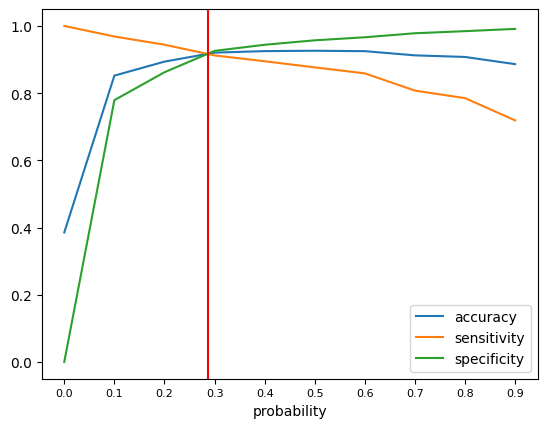

In [3201]:
# Plotting accuracy, sensitivity and specificity for various probabilities:-
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.xticks(np.arange(0,1,step=0.1),size=8)
plt.axvline(x=0.286, color='r', linestyle='-')
plt.show()

**Insights:**
* From the above curve, we can see that 0.286 is optimal cutoff point that we can take for calculating the final predicted values.


### Calculate Final Predicted values using 0.286 as the cutoff point

In [3202]:
# Calculating 'final_predicted' using 0.286 as the cutoff point
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.286 else 0)

In [3203]:
#Let's delete the redundant probability columns
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], axis = 1, inplace = True)

In [3204]:
# Creating a new column 'Lead Score' and assigning values based on 'Converted_Prob' 
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))

In [3205]:
# Get the dataset details using head()
y_train_pred_final.head() 

Converted  Converted_Prob  Prospect ID  Final_Predicted  Lead_Score
0          0        0.028853         3385                0           3
1          1        0.998530         2273                1         100
2          0        0.406105         4234                1          41
3          0        0.002384          945                0           0
4          0        0.021774         8689                0           2

#### Confusion Matrix

In [3206]:
# Let's create the confusion matrix
confusion_matrix_1 = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)
print(f"Confusion Matrix is: {confusion_matrix_1}\n")

Confusion Matrix is: [[3562  290]
 [ 208 2207]]



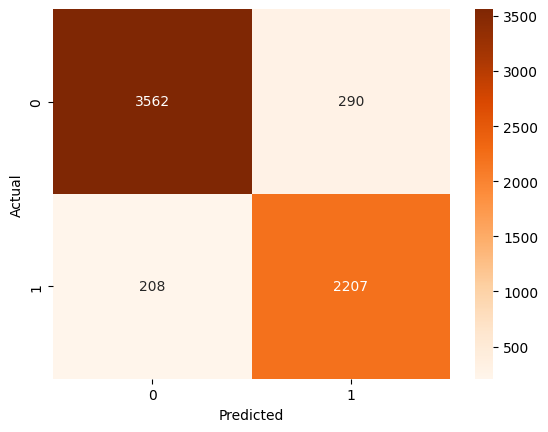

In [3207]:
# Let's plot confusion matrix:-
sns.heatmap(confusion_matrix_1, cmap='Oranges', annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Calculate all metrics using confusion matrix for training dataset

In [3208]:
# Let's check the accuracy
acc_score = accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)
print(f'Accuracy score is: {acc_score}')

Accuracy score is: 0.9205361416945907


In [3209]:
TP = confusion_matrix_1[1,1] # true positive 
TN = confusion_matrix_1[0,0] # true negatives
FP = confusion_matrix_1[0,1] # false positives
FN = confusion_matrix_1[1,0] # false negatives

In [3210]:
# Let's check the metrics for our logistic regression model

# Sensitivity
sensitivity = TP/float(TP+FN)
print(f'Sensitivity for the Logistic Model is : {sensitivity} \n')

# Specificity
specificity = TN/float(TN+FP)
print(f'Specificity for the Logistic Model is : {specificity} \n')

# False Postive Rate
false_pos_rate = FP/float(TN+FP)
print(f'False Positive Rate for the Logistic Model is : {false_pos_rate} \n')

# Positive Predictive Value
pos_pred = TP/float(TP+FP)
print(f'Positive Predictive Value for the Logistic Model is : {pos_pred} \n')

# Negative Predictive Value
neg_pred = TN/float(TN+ FN)
print(f'Negative Predictive Value for the Logistic Model is : {neg_pred} \n')

# Precision
precision = TP/(TP + FP)
print(f'Precision for the Logistic Model is : {precision} \n')

# Recall
recall = TP/(TP + FN)
print(f'Recall for the Logistic Model is : {recall} \n')


# Calculating precision score and recall using sklearn package

# Precision:
precision = precision_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)
print(f'Precision for the Logistic Model is : {precision} \n')

# Recall
recall = recall_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)
print(f'Recall for the Logistic Model is : {recall} \n')

Sensitivity for the Logistic Model is : 0.913871635610766 

Specificity for the Logistic Model is : 0.9247144340602285 

False Positive Rate for the Logistic Model is : 0.07528556593977155 

Positive Predictive Value for the Logistic Model is : 0.8838606327593111 

Negative Predictive Value for the Logistic Model is : 0.9448275862068966 

Precision for the Logistic Model is : 0.8838606327593111 

Recall for the Logistic Model is : 0.913871635610766 

Precision for the Logistic Model is : 0.8838606327593111 

Recall for the Logistic Model is : 0.913871635610766 



**Insights:**

Metrics for the Train Data are below:
* Accuracy : 91.99%
* Sensitivity : 91.35%
* Specificity : 92.39%
* Precision : 88.28%
* Recall : 91.35%

### Plot ROC Curve

* ROC curve shows the tradeoff between sensitivity and specificity.
* The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

In [3211]:
# Creating a utility function to plot the ROC Curve

def plot_roc(actual, prob):
    fpr, tpr, thresholds = roc_curve(actual, prob, drop_intermediate = False )
    auc_score = roc_auc_score(actual, prob)
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [3212]:
fpr, tpr, thresholds = roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

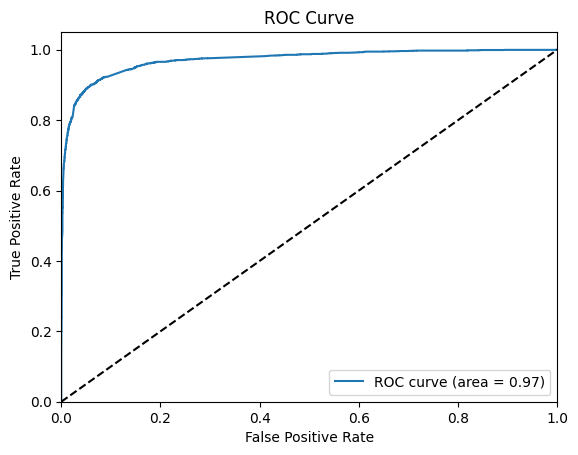

In [3213]:
# Plot ROC Curve for 'y_train_pred_final'
plot_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

**Insights:**<br>
We are getting a good value of 0.97 indicating a good predictive model.

### Precision Recall Tradeoff curve

In [3214]:
precision, recall, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

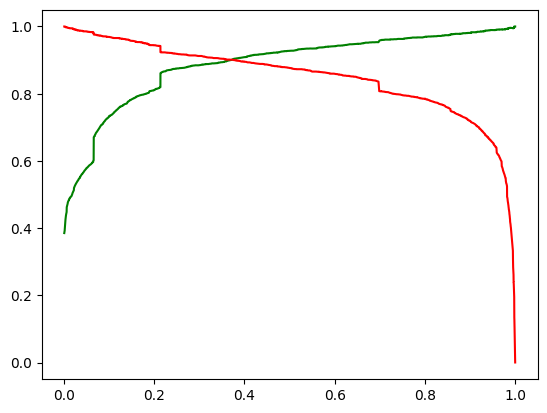

In [3215]:
# Plot precision and recall metrics
plt.plot(thresholds, precision[:-1], "g-")
plt.plot(thresholds, recall[:-1], "r-")
plt.show()

**Insights:**<br>
From the 'Precision Recall Tradeoff Curve' we can see that cutoff point is 0.358

### Calculate Final Predicted values using threshold value from 'Precision Recall Tradeoff Curve'

In [3216]:
# Let's use the threshold value from 'Precision Recall Tradeoff Curve' for Data Evaluation
y_train_pred_final['Final_Predicted_2'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.358 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Final_Predicted  Lead_Score  \
0          0        0.028853         3385                0           3   
1          1        0.998530         2273                1         100   
2          0        0.406105         4234                1          41   
3          0        0.002384          945                0           0   
4          0        0.021774         8689                0           2   

   Final_Predicted_2  
0                  0  
1                  1  
2                  1  
3                  0  
4                  0

#### Confusion Matrix

In [3217]:
# Confusion matrix:-
confusion_matrix_2 = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted_2)
print(f"Confusion Matrix is: {confusion_matrix_2}\n")

Confusion Matrix is: [[3600  252]
 [ 237 2178]]



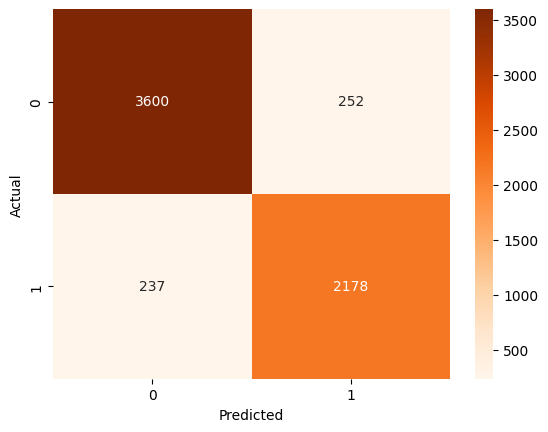

In [3218]:
# Let's plot confusion matrix:-
sns.heatmap(confusion_matrix_2, cmap='Oranges', annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Calculate all metrics using confusion matrix for training dataset

In [3219]:
#Let's calculate all the metrics and accuracy using the new predicted value
acc_score = accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted_2)
print(f'Accuracy score is: {acc_score}')

Accuracy score is: 0.9219722355193872


In [3220]:
TP = confusion_matrix_2[1,1] # true positive 
TN = confusion_matrix_2[0,0] # true negatives
FP = confusion_matrix_2[0,1] # false positives
FN = confusion_matrix_2[1,0] # false negatives

In [3221]:
# Let's check the metrics for our logistic regression model

# Sensitivity
sensitivity = TP/float(TP+FN)
print(f'Sensitivity for the Logistic Model is : {sensitivity} \n')

# Specificity
specificity = TN/float(TN+FP)
print(f'Specificity for the Logistic Model is : {specificity} \n')

# False Postive Rate
false_pos_rate = FP/float(TN+FP)
print(f'False Positive Rate for the Logistic Model is : {false_pos_rate} \n')

# Positive Predictive Value
pos_pred = TP/float(TP+FP)
print(f'Positive Predictive Value for the Logistic Model is : {pos_pred} \n')

# Negative Predictive Value
neg_pred = TN/float(TN+ FN)
print(f'Negative Predictive Value for the Logistic Model is : {neg_pred} \n')

# Precision
precision = TP/(TP + FP)
print(f'Precision for the Logistic Model is : {precision} \n')

# Recall
recall = TP/(TP + FN)
print(f'Recall for the Logistic Model is : {recall} \n')


# Calculating precision score and recall using sklearn package

# Precision:
precision = precision_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted_2)
print(f'Precision for the Logistic Model is : {precision} \n')

# Recall
recall = recall_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted_2)
print(f'Recall for the Logistic Model is : {recall} \n')

Sensitivity for the Logistic Model is : 0.901863354037267 

Specificity for the Logistic Model is : 0.9345794392523364 

False Positive Rate for the Logistic Model is : 0.06542056074766354 

Positive Predictive Value for the Logistic Model is : 0.8962962962962963 

Negative Predictive Value for the Logistic Model is : 0.9382329945269742 

Precision for the Logistic Model is : 0.8962962962962963 

Recall for the Logistic Model is : 0.901863354037267 

Precision for the Logistic Model is : 0.8962962962962963 

Recall for the Logistic Model is : 0.901863354037267 



**Insights:**

From the Precision - Recall trade off curve cut off point(0.385) we see that
* True Positive numbers have decreased and True Negative numbers have increased
* Sensitivity/Recall has decreased.

Thus, we cannot use Precision-Recall trade-off method. Thus we will use 0.286 as optimal cutoff point.

## MAKING PREDICTIONS ON TEST DATASET

In [3222]:
# Let's scale the test dataset.

# Create an instance of StandardScaler
scaler = StandardScaler()

# Let's standardize the numerical columns
num_cols = X_test.select_dtypes(include=['float64', 'int64']).columns
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])
X_test.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
5098                            -1.070218                  -0.242344   
4535                             0.934389                  -0.242344   
3190                            -1.070218                  -0.242344   
7457                            -1.070218                  -0.242344   
6974                            -1.070218                  -0.242344   

      Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
5098                -0.051117             -0.051117           -0.696275   
4535                -0.051117             -0.051117            1.436215   
3190                -0.051117             -0.051117           -0.696275   
7457                -0.051117             -0.051117           -0.696275   
6974                -0.051117             -0.051117           -0.696275   

      Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
5098                1.991201                   -0.382614           -0.047316   
4535               -0.502210                   -0.382614           -0.047316   
3190               -0.502210                    2.613600           -0.047316   
7457               -0.502210                    2.613600           -0.047316   
6974                1.991201                   -0.382614           -0.047316   

      Lead Source_Reference  Lead Source_Referral Sites  ...  \
5098              -0.195623                   -0.109806  ...   
4535              -0.195623                   -0.109806  ...   
3190              -0.195623                   -0.109806  ...   
7457              -0.195623                   -0.109806  ...   
6974              -0.195623                   -0.109806  ...   

      Last Notable Activity_Modified  \
5098                       -0.748813   
4535                       -0.748813   
3190                       -0.748813   
7457                        1.335447   
6974                       -0.748813   

      Last Notable Activity_Olark Chat Conversation  \
5098                                       6.981457   
4535                                      -0.143237   
3190                                      -0.143237   
7457                                      -0.143237   
6974                                      -0.143237   

      Last Notable Activity_Others  \
5098                     -0.126036   
4535                     -0.126036   
3190                     -0.126036   
7457                     -0.126036   
6974                     -0.126036   

      Last Notable Activity_Page Visited on Website  \
5098                                      -0.188325   
4535                                      -0.188325   
3190                                      -0.188325   
7457                                      -0.188325   
6974                                      -0.188325   

      Last Notable Activity_SMS Sent  Do Not Email  TotalVisits  \
5098                       -0.560437     -0.287451    -1.091392   
4535                        1.784321     -0.287451    -0.407107   
3190                        1.784321     -0.287451     0.277179   
7457                       -0.560437     -0.287451     0.619322   
6974                        1.784321     -0.287451    -1.091392   

      Total Time Spent on Website  Page Views Per Visit  \
5098                    -0.867656             -1.207966   
4535                     0.360628             -0.175668   
3190                     2.087613              0.856631   
7457                    -0.511176              1.372780   
6974                    -0.867656             -1.207966   

      A free copy of Mastering The Interview  
5098                               -0.665815  
4535                               -0.665815  
3190                               -0.665815  
7457                               -0.665815  
6974                               -0.665815  

[5 rows x 49 columns]

In [3223]:
# Print the columns
X_train_rfe.columns

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Others', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_SMS Sent',
       'Total Time Spent on Website'],
      dtype='object')

In [3224]:
col = X_train_rfe.columns

# Get the dataframe with the required columns selected after RFE
X_test = X_test[col]

# Adding constant variable to test dataframe:-
X_test_sm = sm.add_constant(X_test)

X_test_sm.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 2686 entries, 5098 to 1494
Data columns (total 14 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   const                                     2686 non-null   float64
 1   Lead Origin_Landing Page Submission       2686 non-null   float64
 2   Lead Origin_Lead Add Form                 2686 non-null   float64
 3   Lead Source_Olark Chat                    2686 non-null   float64
 4   Lead Source_Welingak Website              2686 non-null   float64
 5   Last Activity_SMS Sent                    2686 non-null   float64
 6   Tags_Closed by Horizzon                   2686 non-null   float64
 7   Tags_Lost to EINS                         2686 non-null   float64
 8   Tags_Others                               2686 non-null   float64
 9   Tags_Ringing                              2686 non-null   float64
 10  Tags_Will revert after reading the ema

### Making Predictions on the y_test dataset

In [3225]:
# Make predictions on test dataset
y_test_pred = model3.predict(X_test_sm)
y_test_pred

5098    0.069880
4535    0.689896
3190    0.967797
7457    0.004712
6974    0.995237
          ...   
7460    0.006349
5771    0.073570
3221    0.880559
3275    0.225466
1494    0.006349
Length: 2686, dtype: float64

In [3226]:
# Re-shaping the test predicted values
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.06988006, 0.68989597, 0.96779727, 0.00471218, 0.99523671,
       0.06988006, 0.22546646, 0.06988006, 0.06210691, 0.0587836 ])

In [3227]:
# Converting y_test_pred array to Dataframe
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

0
0  0.069880
1  0.689896
2  0.967797
3  0.004712
4  0.995237

In [3228]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [3229]:
# Putting 'Prospect ID' to index
y_test_df['Prospect ID'] = y_test_df.index

In [3230]:
# Removing index for both dataframe
y_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [3231]:
# Concatenating y_test_df and y_pred
y_test_pred_final = pd.concat([y_test_df, y_pred],axis=1)

In [3232]:
# check the dataset details using head()
y_test_pred_final.head()

Converted  Prospect ID         0
0          0         5098  0.069880
1          1         4535  0.689896
2          1         3190  0.967797
3          0         7457  0.004712
4          1         6974  0.995237

In [3233]:
# Renaming the column 
y_test_pred_final = y_test_pred_final.rename(columns={0 : 'Converted_Prob'})

In [3234]:
# Creating 'Lead Score' column
y_test_pred_final['Lead_Score'] = y_test_pred_final.Converted_Prob.map( lambda x: round(x*100))

In [3235]:
# check the dataset details using head()
y_test_pred_final.head()

Converted  Prospect ID  Converted_Prob  Lead_Score
0          0         5098        0.069880           7
1          1         4535        0.689896          69
2          1         3190        0.967797          97
3          0         7457        0.004712           0
4          1         6974        0.995237         100

In [3236]:
#Calculating 'Final_Predicted' based on 'Converted_Prob' based on cutoff 0.286
y_test_pred_final['Final_Predicted'] = y_test_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.286 else 0)

In [3237]:
# Printing the final dataset
y_test_pred_final.head()

Converted  Prospect ID  Converted_Prob  Lead_Score  Final_Predicted
0          0         5098        0.069880           7                0
1          1         4535        0.689896          69                1
2          1         3190        0.967797          97                1
3          0         7457        0.004712           0                0
4          1         6974        0.995237         100                1

**Insights:**

Lead Score is assigned to the customers.

* The customers with a higher lead score have a higher chance of conversion.
* The customers with a lower lead score have a lower chance of conversion.

### Test model evaluation

In [3238]:
# Checking the accuracy:-
acc_score = accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Final_Predicted)
print(f'Accuracy score is: {acc_score}')

Accuracy score is: 0.9270290394638868


#### Confusion Matrix

In [3239]:
# Calculating confusion matrix for test data
confusion_matrix_3 = confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.Final_Predicted )
print(f'Confusion Matrix is:\n{confusion_matrix_3}')

Confusion Matrix is:
[[1580  126]
 [  70  910]]


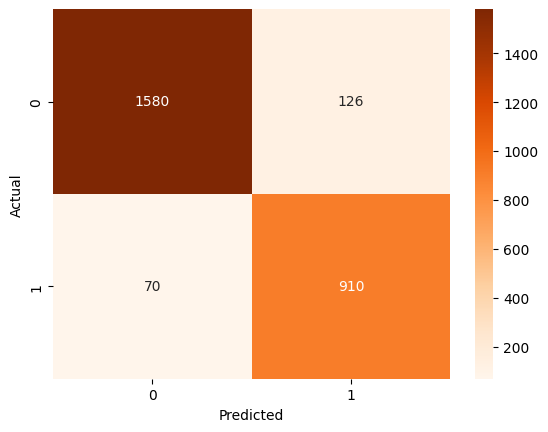

In [3240]:
# Plotting confusion matrix
sns.heatmap(confusion_matrix_3, cmap='Oranges', annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [3241]:
TP = confusion_matrix_3[1,1] # true positive 
TN = confusion_matrix_3[0,0] # true negatives
FP = confusion_matrix_3[0,1] # false positives
FN = confusion_matrix_3[1,0] # false negatives

In [3242]:
# Let's check the metrics for our logistic regression model

# Sensitivity
sensitivity = TP/float(TP+FN)
print(f'Sensitivity for the Logistic Model is : {sensitivity} \n')

# Specificity
specificity = TN/float(TN+FP)
print(f'Specificity for the Logistic Model is : {specificity} \n')

# False Postive Rate
false_pos_rate = FP/float(TN+FP)
print(f'False Positive Rate for the Logistic Model is : {false_pos_rate} \n')

# Positive Predictive Value
pos_pred = TP/float(TP+FP)
print(f'Positive Predictive Value for the Logistic Model is : {pos_pred} \n')

# Negative Predictive Value
neg_pred = TN/float(TN+ FN)
print(f'Negative Predictive Value for the Logistic Model is : {neg_pred} \n')

# Precision
precision = TP/(TP + FP)
print(f'Precision for the Logistic Model is : {precision} \n')

# Recall
recall = TP/(TP + FN)
print(f'Recall for the Logistic Model is : {recall} \n')


# Calculating precision score and recall using sklearn package

# Precision:
precision = precision_score(y_test_pred_final.Converted, y_test_pred_final.Final_Predicted)
print(f'Precision for the Logistic Model is : {precision} \n')

# Recall
recall = recall_score(y_test_pred_final.Converted, y_test_pred_final.Final_Predicted)
print(f'Recall for the Logistic Model is : {recall} \n')

Sensitivity for the Logistic Model is : 0.9285714285714286 

Specificity for the Logistic Model is : 0.9261430246189918 

False Positive Rate for the Logistic Model is : 0.0738569753810082 

Positive Predictive Value for the Logistic Model is : 0.8783783783783784 

Negative Predictive Value for the Logistic Model is : 0.9575757575757575 

Precision for the Logistic Model is : 0.8783783783783784 

Recall for the Logistic Model is : 0.9285714285714286 

Precision for the Logistic Model is : 0.8783783783783784 

Recall for the Logistic Model is : 0.9285714285714286 



**Insights:**

* The sensitivity value for test data is 92.86% while for train data is also 91.35%. 
* The accuracy values is 92.70%. This indicates that model is performing well for test data set also.

## MODEL PARAMETERS

### Model Features

**The final logistic regression model has 13 features:**

* Lead Origin_Landing Page Submission
* Lead Origin_Lead Add Form
* Lead Source_Olark Chat
* Lead Source_Welingak Website
* Last Activity_SMS Sent
* Tags_Closed by Horizzon
* Tags_Lost to EINS
* Tags_Others
* Tags_Ringing
* Tags_Will revert after reading the email
* Last Notable Activity_Email Opened
* Last Notable Activity_SMS Sent
* Total Time Spent on Website

### Equation of line for the model:

**Equation of line for the model:**

**Converted** = -0.765079 - 0.367659 X Lead Origin_Landing Page Submission + 0.403844 X Lead Origin_Lead Add Form + 0.274769 X Lead Source_Olark Chat + 0.468541 X Lead Source_Welingak Website + 0.547402 X Last Activity_SMS Sent + 1.291309 X Tags_Closed by Horizzon + 0.840598 X Tags_Lost to EINS - 1.010874 X Tags_Others - 1.170860 X Tags_Ringing + 1.851406 X Tags_Will revert after reading the email + 0.626698 X Last Notable Activity_Email Opened + 0.978982 X Last Notable Activity_SMS Sent

## CONCLUSION

### Overall Evaluation Metrics Insights

**Evaluation Metrics for the train Dataset**   
* Accuracy : 91.99%
* Sensitivity : 91.35%
* Specificity : 92.39%
* Precision : 88.28%
* Recall : 91.35%


**Evaluation Metrics for the test Dataset**
* Accuracy : 92.70%
* Sensitivity : 92.86%
* Specificity : 92.61%
* Precision : 87.84%
* Recall : 92.86%

### Insights

* The model achieved a sensitivity of 91.35% in the train set and 92.86% in the test set, using a cut-off value of 0.286.
* The model also achieved an accuracy of ~91%
* The Optimal cutoff probability point is 0.286. Converted probability greater than 0.286 will be predicted as Converted lead & probability smaller than 0.286 will be predicted as not Converted lead.

  
**Top three features that contribute positively to predict hot leads are:**
* Tags_Will revert after reading the email
* Total Time Spent on Website
* Last Notable Activity_SMS Sent

## RECOMMENDATIONS

### Increase Conversion Rate

To improve the potential lead conversion rate X-Education should focus on the top important features:

* **Tags_Will revert after reading the email:** As the leads with tags, will revert after reading the email is high, so the company should focus more on email marketing.
* **Total Time Spent on Website:** Leads spending more time on website can be our potential lead.
* **Last Notable Activity_SMS Sent** Lead whose last activity is sms sent can be potential lead for company.
* **Tags_Closed by Horizzon:** Tags closed by Horizzon have a good conversion rate.
* Focus on features with **positive coefficients**.
* **Working professionals** to be targeted as they have high conversion rate.
* Develop strategies to attract high-quality leads from **performing lead sources**.

### Areas of improvement

* Analyze negative coefficients for **Tags_Others, Tags_Ringing**.
* Review **landing page submission** process for areas of improvement.